<font color='RED'><center><h1>***************PREDICTING APS SYSTEM FAILURES IN HEAVY SCANIA TRUCKS***************</h1></center></font>
<font color='red'><center><h2>IDA (INDUSTRIAL CHALLENGE)-2016 CHALLENGE</h2></center></font>

<img src="https://i.imgur.com/FTR4O28.jpeg">
<center>Air brake system in a truck</center>

<h2>About the challenge:</h2>
The IDA 2016 challenge aims at devising a machine learning model for judging whether a truck is at a risk of having an immnent failure of a specific component or not. The component here in focus is the <b>APS (Air Pressure System)</b>.

<h2>About the APS:</h2>
The APS of a truck is responsible for creating air pressure in trucks and other heavy duty vehicles which is utilized for various operations such as air brakes, changing gears etc. A heavy haul truck uses air brakes instead of hydraulic brakes. These air brakes require a constant supply of pressurized air to be able to work(disengage) properly. If due to any problem, the air pressure gets compromised, the brakes are not going to disengage properly, thus leading to the truck coming to a stop and it will not move unless the fault is repaired. 
The Air Pressure system is spread throughout the truck and has a lot of expensive components that increases the potential spots for a failure to occur.<br>
Source: https://www.quora.com/Why-do-trucks-use-air-brakes

<h2>Business Problem:</h2>
The problem is aimed at determining whether a problem in a heavy duty truck is related to the APS or to any other component. This makes it a binary classification problem with one class representing a problem in the APS whereas the other representing otherwise. The model has to classify the datapoints into one of the classes fairly accurately and failing to do so is going to waste valuable time and money of the concerned people, i.e. truck/fleet owners and repairmen. Not all the errors however, are of equal adversity. Wrongly classifying a fault in the APS to another class is much more dangerous than the other way round and must be avoided at all costs.

<h2>About the dataset:</h2>
The dataset is created by Scania by collecting data from its heavy duty trucks during their everyday usage. The dataset is a binary class dataset with the positive class representing a fault in the APS system and the negative class representing a problem in the truck not related to the APS. The dataset is divided into two parts, a train set and a test set. The train set has 60,000 datapoints and 16,000 in the test set. There are 59,000 datapoints belonging to the negative class while only 1,000 belong to the positive class which makes the dataset highly imbalanced.<br>
The dataset has 171 features, including the class labels, all of which are numerical features. The features have been selected by experts and their names have been anonymised due to proprietary reasons. Out of the 171 features, there are 7 histogram features. The naming scheme of features is as follows:

>Each feature name is of the form __"Identifier_bin-no"__. For a numerical feature, the names are like __"Identifier_00"__ and for a particular bin of a histogram feature, the names are of the form, __"Identifier_bin-no"__.

Typically these histogram features have open ended conditions on each end. For example, if we are measuring the ambient temperature "T" then the histogram could bee defined with 4 bins where:<br>
<pre>
- bin 1 collect values for temperature T < -20
- bin 2 collect values for temperature T >= -20 and T < 0    
- bin 3 collect values for temperature T >= 0 and T < 20 
- bin 4 collect values for temperature T > 20
</pre>

 |  b1  |  b2  |  b3  |  b4  |   
&emsp;-20&emsp;0&emsp;20

<h2>Business Objectives and Constraints:</h2>
<ul>
The major constraints for this problem statements are as follows:
<li><b>Low Latency:</b>The predictions need to be very fast, we do not want to wait for getting a prediction as repairs and maintainence need to be immediately done or it can be very costly. Thus, this problem is a low-latency problem.</li>
<li><b>Cost of misclassification:</b>The cost of misclassificaion can be very high as wrongly classifying a problem can be misleading. The cost of classifying a positive class datapoint to belong to a negative class is much more dangerous and hence carries a higher cost than classifying a negative datapoint to a positve datapoint.</li>
<li><b>Model Interpretability:</b>The model needs to be interpretable since the concerned people would want to know the reason because of which the model has predicted the fault to be a fault of the APS.</li>
</ul>

<h2>Performance Metrics:</h2>
The following performance metrics have been used:<br>
<ul>
    <li><b>Confusion, Precision and Recall Matrices:</b> Since the dataset is highly imbalance, evaluating the model individually on each class is important. Confusion matrix is the best choice for that. Precision and Recall matrices on the other hand will tell us about the precision and recall scores of the model for each class. Out of the precision and recall scores, the recall score will be more important and carry more weight, especially for the positive class. This is because we want to correctly predict as many points as possible, especially for the positive class.</li>
    <li><b>F1 Score:</b> F1 score will also be used as a metric because it is a single number that can tell us the models performance based on the precision and recall of the model. We will be using the _Macro Averaging_ method for the F1 score. The reason for this is that we want to get the average performance of the model in terms of f1 score. Using the micro averaging will give us scores by taking class imbalance into account and that will give us a higher value. However, since we want to exclusively judge the model on the positive class, macro averaging will be a better choice.</li>
    <li><b>Custom Performance Metric</b>: The organizers have also defined a custom performance metric based on costs. It is defined as:<center>$(10 * 𝐹𝑃) + (500 * 𝐹𝑁)$</center></li>Here, the numbers associated with the different errors are their costs. The cost corresponding to a False Negative point is 50 times of the cost associated with a False Positive point, which makes it much more important. We need to minimize this cost metric as much as possible.
</ul>

## References:
The following research papers, blogs and kernels are used as references while performing this case study:
- Combining Boosted Trees with Metafeature Engineering for Predictive Maintainence - https://www.researchgate.net/publication/313067390_Combining_Boosted_Trees_with_Metafeature_Engineering_for_Predictive_Maintenance
- Towards Data Science Blog; Predicting a Failure in Scania’s Air Pressure System - by Rithwik Shetty - https://towardsdatascience.com/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038
- SMOTEBoost - 1. Blog - https://medium.com/urbint-engineering/using-smoteboost-and-rusboost-to-deal-with-class-imbalance-c18f8bf5b805
    2. Paper - SMOTEBOOST- Improving Performance of the Minority Class in Boosting - https://www.researchgate.net/publication/220698913_SMOTEBoost_Improving_Prediction_of_the_Minority_Class_in_Boosting
- RUSBoost - 1. Blog - https://medium.com/urbint-engineering/using-smoteboost-and-rusboost-to-deal-with-class-imbalance-c18f8bf5b805
     2. Paper - RUSBoost: A Hybrid Approach to Alleviating Class Imbalance- https://sci2s.ugr.es/keel/pdf/algorithm/articulo/2010-IEEE%20TSMCpartA-RUSBoost%20A%20Hybrid%20Approach%20to%20Alleviating%20Class%20Imbalance.pdf
- Various Techniques for Missing Data Imputation-
https://towardsdatascience.com/6-different-ways-to-compensate-formissing-values-data-imputation-with-examples-6022d9ca0779
- MICE- Multiple Imputation by Chained Equations
    1. Blog: Multiple Imputations using Random Forests in Python - https://towardsdatascience.com/multiple-imputation-with-random-forests-inpython-dec83c0ac55b
    2. Youtube Video explaining MICE algotihm: https://www.youtube.com/watch?v=WPiYOS3qK70&ab_channel=RachitToshniwal
    3. Sklearn IterativeImputer - https://scikit-earn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html<br>
      https://www.youtube.com/watch?v=1n7ld38PjEc
    4. Comparing different models for mice, sklearn: https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html
- AUTOENCODERS for feature engineering:- https://machinelearningmastery.com/autoencoder-for-classification/

## Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from tqdm import tqdm
# from imblearn.over_sampling import SMOTE
import pickle
import os
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer # IterativeImputer is still in experimental stage and hence we need to enable it
from sklearn.impute import IterativeImputer ,KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print('Libraries imported successfully!')

Libraries imported successfully!


## Loading the Datasets

In [2]:
# loading the train dataset
train = pd.read_csv('Data\\train.csv', na_values=['na'])
print('Shape of train dataset:', train.shape)
train.head()

Shape of train dataset: (60000, 171)


class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3     0.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [3]:
# loading the test set
test = pd.read_csv('Data\\testset.csv', na_values=['na'])
print('Shape of test dataset:', test.shape)
test.head()

Shape of test dataset: (16000, 171)


class  aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

## Basic EDA of the dataset
### 1. Class distribution of the dataset

In [4]:
class_disb = train['class'].value_counts()
print("Number of Positive Class datapoints in the dataset:", class_disb['pos'])
print("Number of Negative Class datapoints in the dataset:", class_disb['neg'])

Number of Positive Class datapoints in the dataset: 1000
Number of Negative Class datapoints in the dataset: 59000


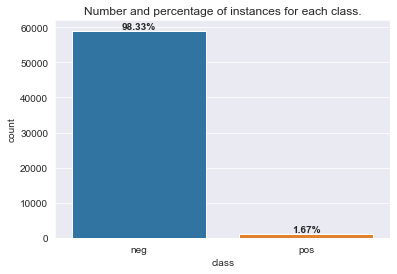

In [15]:
# plotting the countplot showing percentage of class distribution
class_perc = (class_disb/sum(class_disb)).values
plot = sns.countplot(data=train, x='class')

# add labels to seaborn plots - https://stackoverflow.com/a/55427207/11881261
for i, bar in enumerate(plot.axes.patches):
    # get the height of bar - this will act as the y-axis for the text
    ht = bar.get_height()
    # add text
    plot.axes.text(x=i, y=ht+10, s=str(round(class_perc[i]*100,2))+'%',
                   fontdict={'ha':'center', 'va':'bottom', 'fontweight':'bold'})
    
plt.title("Number and percentage of instances for each class.")
plt.show()

As it can be clearly seen with from the plot and the text, the dataset is highly imbalanced with __59000 out of the 60000 (~98.3%) datapoints belonging to the negative class__ while only __1000 datapoints (~1.7%) belong to the positive class.__ If we want our model to peform well in this dataset, we will have to use techniques to counter this data imbalance.
___

## 2. Analysing the number of bin features
The dataset has 7 histogram features where a column corresponds to a bin of the histogram feature. Let us analyze how many such features are there and the number of bins for each histogram feature.
The naming scheme of the features is such that every feature name is of the form, __feature-name_bin_number__, for example "_aa_000_" etc. For a histogram feature, there will be multiple occurences of the same feature name.

In [16]:
# getting all the unique feature names
features = train.columns.tolist()[1:] # the first feature is class and we dont want to analyze that
feature_names = []
for ft in tqdm(features):
    ft_name = ft.split('_')[0]
    if ft_name not in feature_names:
        feature_names.append(ft_name)
        
print("Number of unique feature names:", len(feature_names))

100%|████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 167653.82it/s]

Number of unique feature names: 107


There are 107 unique feature names. And given that we  have 7 histogram features, we can say that there are 70 features that are histogram features while 100 are numerical features. Now, lets see what are the names of the histogram features and how many bins are there for each features.

In [23]:
# getting only the feature names for each feature
only_names = list(map(lambda fn: fn.split('_')[0], features))
feature_counts = {fn:only_names.count(fn) for fn in only_names}

hist_features = [k for k,v in feature_counts.items() if v>1]
print("Number of histogram features:", len(hist_features))

print("Names of Histogram features:", *hist_features, sep='\n')

Number of histogram features: 7
Names of Histogram features:
ag
ay
az
ba
cn
cs
ee


In [26]:
# finding how many bins are there for each histogram feature
print("Number of bins for each histogram feature:")
for ft in hist_features:
    print(ft, ':', feature_counts[ft])
    print('-'*100)

Number of bins for each histogram feature:
ag : 10
----------------------------------------------------------------------------------------------------
ay : 10
----------------------------------------------------------------------------------------------------
az : 10
----------------------------------------------------------------------------------------------------
ba : 10
----------------------------------------------------------------------------------------------------
cn : 10
----------------------------------------------------------------------------------------------------
cs : 10
----------------------------------------------------------------------------------------------------
ee : 10
----------------------------------------------------------------------------------------------------


### 3. Checking for duplicates.

In [16]:
dups = train[train.duplicated()]
print("Number of duplicated rows:", dups.shape[0])

Number of duplicated rows: 0


Looks like there are no duplicate values in the dataset.
___
### 4. Checking for missing values.
#### 4.1 Checking missing values per datapoint.

In [29]:
# printing the number of missing values
miss_df = train[train.isnull().any(axis=1)]
print('Number of rows with missing values in any of the features:', miss_df.shape[0])
print("Percentage of rows that have missing values:", (miss_df.shape[0]/train.shape[0])*100, '%')

Number of rows with missing values in any of the features: 59409
Percentage of rows that have missing values: 99.015 %


In [35]:
# lets find out the number of missing values in each row 
na_count = train.isnull().sum(axis=1)

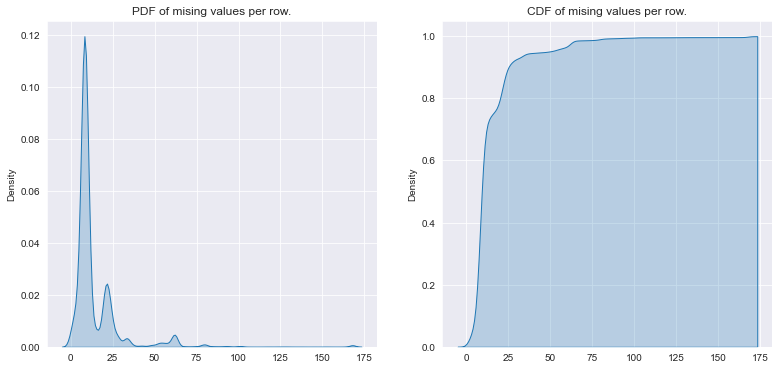

In [36]:
# plotting the pdf and cdf of the number of na values per row
fig, ax = plt.subplots(ncols=2, figsize=(13,6))

# pdf
sns.kdeplot(na_count, shade=True, ax=ax[0])
ax[0].set_title('PDF of mising values per row.')

# cdf
sns.kdeplot(na_count, shade=True, cumulative=True, ax=ax[1])
ax[1].set_title('CDF of mising values per row.')

plt.show()

In [40]:
# printing the mean and percentiles for the same
print('Average number of missing values per row:', sum(na_count)/len(na_count))

# printing the percentiles
nan_cnts = na_count.tolist()
nan_cnts.sort()
print("---PERCENTILES---")
percentiles = np.percentile(nan_cnts, np.arange(0,110,10))
i = 0
for p in percentiles:
    print(f"The {i}th percentile is: {p}")
    i += 10

Average number of missing values per row: 14.166916666666667
---PERCENTILES---
The 0th percentile is: 0.0
The 10th percentile is: 6.0
The 20th percentile is: 7.0
The 30th percentile is: 8.0
The 40th percentile is: 8.0
The 50th percentile is: 8.0
The 60th percentile is: 10.0
The 70th percentile is: 10.0
The 80th percentile is: 20.0
The 90th percentile is: 24.0
The 100th percentile is: 168.0


There are 59,409 (about 99%) datapoints that have atleast one missing feature value. This means almost all of the rows have atleast one missing value.<br>
On further analysis of rows, we found out that on an average, every row had around 14 feature values missing. However, the median value is 8, which means that there must by very large number of missing values for some rows. This arguement is confirmed by a 100th percentile of 168 while the 90th percentile is only 24. 

As we can see, there are quite a large anount of missing values, thus it might be intersting to see if the number of missing values have anything related to the class label, i.e., does a class have more missing values than the other? If that is the case having a feature that shows number of missing features in a datapoint can be very helpful in prediction.
Let us analyse that:

In [41]:
# making a dataframe containing class labels and nan counts
labels = train['class'][na_count.index]
nan_df = pd.DataFrame({"class":labels, 'NaN_count':na_count})
print(nan_df.shape)
nan_df.head()

(60000, 2)


class  NaN_count
0   neg          5
1   neg         21
2   neg          8
3   neg          8
4   neg          7

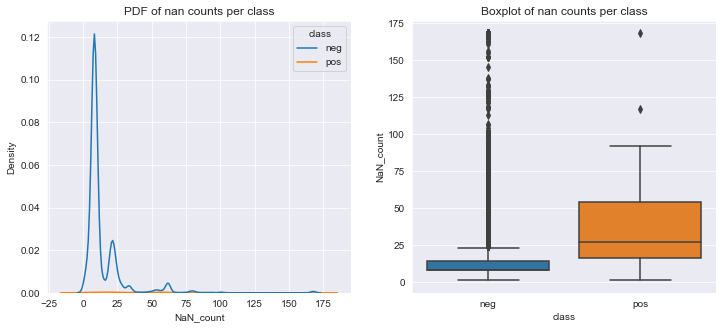

In [41]:
# plotting the pdf and boxplot for both of them
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(x=nan_df['NaN_count'], hue=nan_df['class'], ax=ax[0])
ax[0].set_title("PDF of nan counts per class")
sns.boxplot(data=nan_df, x='class', y='NaN_count', ax=ax[1])
ax[1].set_title('Boxplot of nan counts per class')

plt.show()

As it can be seen from the boxplot, there is a clear difference between the IQRs of the positive and the negative class datapoints. The positive class datapoints have a higher number of missing values compared to negative class datapoints. A possible reason for this might be that a problem in the APS might compromise some sensors/measuring systems causing us to get a missing or NaN value for the datapoint. Thus, measuring that can help our models in prediction. 
One arguement to back this hypothesis of mine is the sheer numbers of missing values in the dataset. As seen earlier, almost 99% of the datapoints have missing values.

__NOTE:__ One thing to note here is how the PDF looks. The negative class PDF is very high but the Positive Class PDF is practically non-existent. This might be because that there are just very less datapoints for the positive class and it gets supressed by the negative class. To get a clear picture, I am plotting the PDFs separately below.

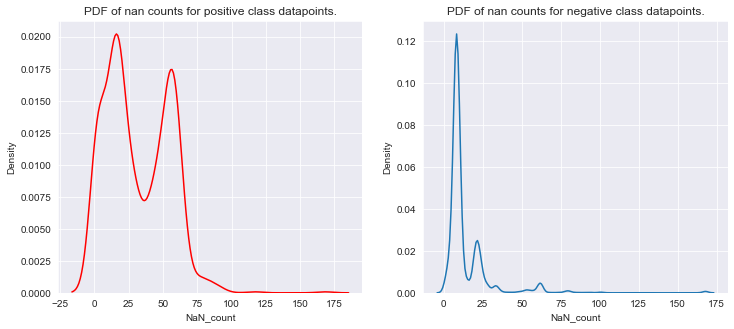

In [62]:
# plotting the PDFs for both the classes separately
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

# positive class
sns.kdeplot(x=nan_df[nan_df['class']=='pos']['NaN_count'], ax=ax[0], color='r')
ax[0].set_title("PDF of nan counts for positive class datapoints.")
# negative class
sns.kdeplot(x=nan_df[nan_df['class']=='neg']['NaN_count'], ax=ax[1])
ax[1].set_title("PDF of nan counts for negative class datapoints.")

plt.show()

From the PDFs as well, we can see the same behaviour as from the boxplot.
___

#### 4.2 Checking for missing values per feature
Now that we have done the analysis of missing values for rows, now we will analyse the missing values for each feature and based on this analysis, we are going to decide how is our missing value imputation strategy going to be.

In [3]:
# counting the number of missing values for each feature
nan_col_cnt = {}
# getting all the features
features = list(train.columns)
features.remove('class')

for feat in tqdm(features):
    column = train[feat]
    # count nans in column
    try:
        nans = column.value_counts()['na']
    except KeyError: # if the column doesnt have any missing value just put 0 in place of it
        nans = 0
    nan_col_cnt[feat] = nans

100%|████████████████████████████████████████████████████████████████████████████████| 170/170 [00:02<00:00, 80.12it/s]


In [6]:
# calculating the percentage of missing values for each feature
nan_col_perc = {f:(c/60000) for f,c in nan_col_cnt.items()}

Looking at the number of features with no missing values.

In [31]:
no_miss = [k for k,v in nan_col_cnt.items() if v==0]
print("Number of features with no missing values:", len(no_miss))
print("Feature(s) with no missing values:", *no_miss)

Number of features with no missing values: 1
Feature(s) with no missing values: aa_000


There is only one feature that has no missing values, others have atleast one missing value. Lets analyze further.

In [6]:
# finding the minimum number of missing values and the corresponding feature(s)
ft_counts = list(nan_col_cnt.values())
least_missing = ft_counts[np.argsort(ft_counts)[1]]
least_missing_ft = [k for k,v in nan_col_cnt.items() if v==least_missing]
print("The least number of missing values for any feature is", least_missing, 'and its corresponding feature is:', *least_missing_ft)

# finding the maximum number or missing values and the corresponding feature(s)
most_missing = ft_counts[np.argsort(ft_counts)[-1]]
most_missing_ft = [k for k,v in nan_col_cnt.items() if v==most_missing]
print("The most number of missing values for any feature is", most_missing, 'and its corresponding feature is:', *most_missing_ft)

The least number of missing values for any feature is 167 and its corresponding feature is: bt_000
The most number of missing values for any feature is 49264 and its corresponding feature is: br_000


In [14]:
# mean value of missing values
mean_missing = sum(ft_counts)/len(ft_counts)
print("The average number of missing features for the features is:", mean_missing)

# printing the percentiles
print("\n---PERCENTILES---")
percentiles = np.percentile(ft_counts, np.arange(0,110,10))
i = 0
for p in percentiles:
    print(f"The {i}th percentile is: {p}")
    print("-"*100)
    i += 10

The average number of missing features for the features is: 5000.088235294118

---PERCENTILES---
The 0th percentile is: 0.0
----------------------------------------------------------------------------------------------------
The 10th percentile is: 642.0
----------------------------------------------------------------------------------------------------
The 20th percentile is: 671.0
----------------------------------------------------------------------------------------------------
The 30th percentile is: 671.0
----------------------------------------------------------------------------------------------------
The 40th percentile is: 671.0
----------------------------------------------------------------------------------------------------
The 50th percentile is: 688.0
----------------------------------------------------------------------------------------------------
The 60th percentile is: 2500.0
-----------------------------------------------------------------------------------------

In [17]:
# lets see how many features have missing values less than the mean and how many have more than the mean
lessthan_ = [k for k,v in nan_col_cnt.items() if v<mean_missing]
morethan_ = [k for k,v in nan_col_cnt.items() if v>mean_missing]

print("Number of features with missing values less than the average:", len(lessthan_))
print('Number of features with missing values less than the average:', len(morethan_))

Number of features with missing values less than the average: 142
Number of features with missing values less than the average: 28


In [20]:
# Only 28 features have missing values, lets print them and their missing counts
print("Features and their counts for features having missing values more than the average:")
print(*["--->"+m+":"+str(nan_col_cnt[m]) for m in morethan_], sep='\n')

Features and their counts for features having missing values more than the average:
--->ab_000:46329
--->ad_000:14861
--->bk_000:23034
--->bl_000:27277
--->bm_000:39549
--->bn_000:44009
--->bo_000:46333
--->bp_000:47740
--->bq_000:48722
--->br_000:49264
--->cf_000:14861
--->cg_000:14861
--->ch_000:14861
--->cl_000:9553
--->cm_000:9877
--->co_000:14861
--->cr_000:46329
--->ct_000:13808
--->cu_000:13808
--->cv_000:13808
--->cx_000:13808
--->cy_000:13808
--->cz_000:13808
--->da_000:13808
--->db_000:13808
--->dc_000:13808
--->ec_00:10239
--->ed_000:9553


All the features, except one (aa_000) have missing values. The minimum number of missing values that we can find for a feature is 167 for feature bt_000 and the most number of missing values are 49264 for feature br_000, which is most of the dataset. Due to this large value, the mean gets shifted to about 5000 missing values for each feature which is almost 9 times the median value of 688.This might indicate that there are some features with absurdly large number of missing values.<br>
Further analysis confirms this assumption where we find out that there are only 28 features that have missing values more than the average and most of them have atleast 9550 missing values out of the 60000 train datapoints which is a lot percentage wise.<br>
For further analysis, lets see the percentage composition of the missing values in each feature and based on the results, finalize our imputation strategy.

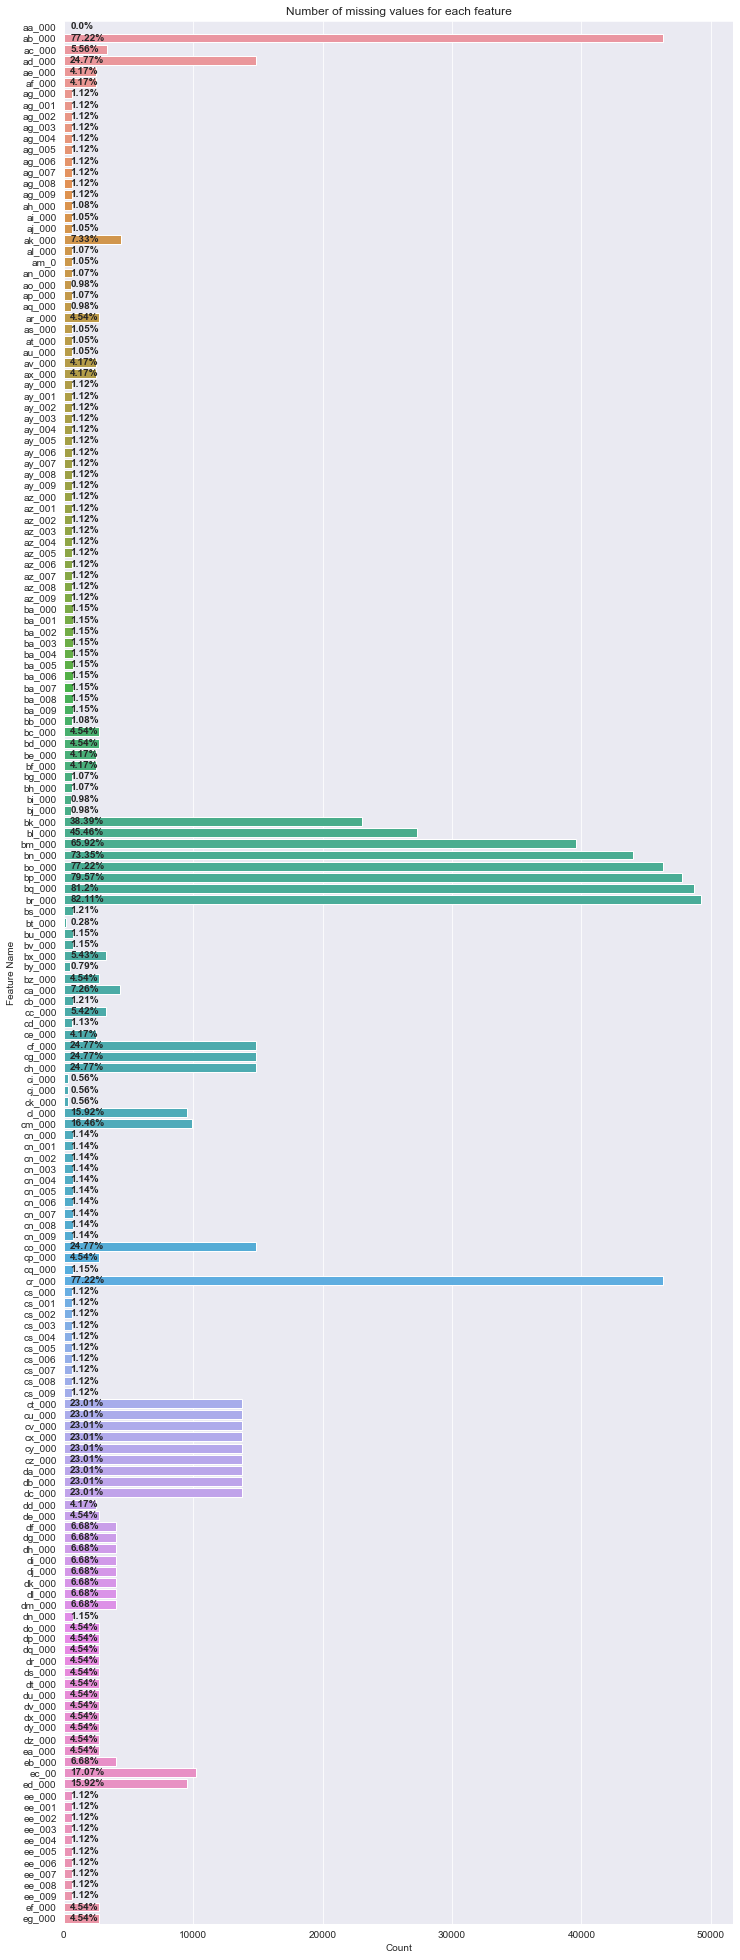

In [21]:
# plotting the number and percentage of missing values for different features
fig, ax = plt.subplots(figsize=(12,35))
bar = sns.barplot(y=list(nan_col_cnt.keys()), x=list(nan_col_cnt.values()), ax=ax)
plt.ylabel("Feature Name")
plt.xlabel("Count")
plt.title("Number of missing values for each feature")

# displaying the %age of missing values per feature
ft_perc = list(nan_col_perc.values())
for i, b in enumerate(bar.axes.patches):
    # get the height of bar - this will act as the y-axis for the text
    ht = b.get_height()
    # add text
    bar.axes.text(y=i, x=ht+500, s=str(round(ft_perc[i]*100,2))+'%',
                   fontdict={'ha':'left', 'va':'center', 'fontweight':'bold'})

plt.show()

As it can be seen from the plot, there is only one feature with no missing values, i.e. aa_000. Most of them have less than 5% of missing values and some others that have missing values between 5-25% and a few between 25-50%. However, there are also some features that have more than 70% features missing.
Lets find what features have how a missing value in a specific range. We will be defining the ranges in the following manner:
- less than 5%
- between 5-15%
- between 15-70%
- more than 70%

In [11]:
# less than 5%
below_5 = [k for k,v in nan_col_perc.items() if v<0.05]
# between 5 to 15%
between_5_15 = [k for k,v in nan_col_perc.items() if v>0.05 and v<0.15]
# between 5 to 70%
between_15_70 = [k for k,v in nan_col_perc.items() if v>0.15 and v<0.70]
# more than 70
above_70 = [k for k,v in nan_col_perc.items() if v>0.70]

print("-----PERCENTAGE DISTRIBUTION OF MISSING VALUES-----")
print('1. Less than 5%:', len(below_5))
print('1. Between 5% and 15%:', len(between_5_15))
print('1. Between 15% and 70%:', len(between_15_70))
print('1. More than 70%:', len(above_70))

-----PERCENTAGE DISTRIBUTION OF MISSING VALUES-----
1. Less than 5%: 128
1. Between 5% and 15%: 14
1. Between 15% and 70%: 21
1. More than 70%: 7


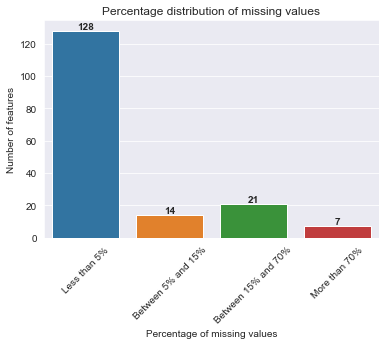

In [25]:
# plotting a bar chart
plot = sns.barplot(x=['Less than 5%', 'Between 5% and 15%', 'Between 15% and 70%', 'More than 70%'],
            y=[len(below_5), len(between_5_15), len(between_15_70), len(above_70)])
plt.title("Percentage distribution of missing values")
plt.xlabel("Percentage of missing values")
plt.ylabel('Number of features')
plt.xticks(rotation=45)

# add labels to seaborn plots - https://stackoverflow.com/a/55427207/11881261
miss_perc = [len(below_5), len(between_5_15), len(between_15_70), len(above_70)]
for i, bar in enumerate(plot.axes.patches):
    # get the height of bar - this will act as the y-axis for the text
    ht = bar.get_height()
    # add text
    plot.axes.text(x=i, y=ht, s=str(miss_perc[i]),
                   fontdict={'ha':'center', 'va':'bottom', 'fontweight':'bold'})
    
plt.show()

Now that we know the distribution of the missing values for different features, we can now make a strategy for imputation of missing values. The strategy will be as follows:
- For features with less than 5% missing values, we will be doing mean imputation.
- For features with missing values between 5 and 15%, we will use median imputation because of its robustness to outliers.<br>
The reason for using these techniques is that the more _advanced_ techniques are much more complicated and hence using them for imputation for such a small number of missing values (relatively) is just overkill. Even though constant value imputations have their own disadvantages but the number of datapoints is too low to affect the performance by a lot. This is just a trade-off that we need to make.
- For features with missing values between 15-70%, we will use model based imputation, MICE algorithm to be exact. The reason is that there are just too many missing values here to impute and too less datapoints to calculate an accurate/precise enough mean and having many datapoints with the same value for a feature is not good since it doesnt add any new information to the dataset. Also, there are not a lot of features that fall under this category and hence it wont harm our _low-latency constraint_.
- For features with >70% missing values, we will drop them entirely from the dataset. This is because we do not have enough data to learn a good enough model for imputation.

refer: https://towardsdatascience.com/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038

### 5. EDA of different features.
Since there are a lot of numerical features, 170 to be exact, doing individual univariate analysis on each one of them is not possible. Therefore, I have decided to take the top 15 features from both the numerical and histogram features and perform EDA on them.<br>
To find the important features, I am going to use random forests to get the feature importances by training it on the train data. For training, missing data needs to be taken care of first. I will perform simple mean imputation for the missing values and use that to train the random forests.

In [8]:
# dropping class labels from train
Y=train['class']
# train=train.drop(columns='class')
# mean imputation on the train data
mean_imputer = SimpleImputer()
mean_imputer.fit(train.drop(columns='class'))
# getting the imputed dataframe
train_eda = pd.DataFrame(mean_imputer.transform(train.drop(columns=['class'])), columns=train.drop(columns='class').columns)
print(train_eda.shape)
train_eda.head()

(60000, 170)


aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0     0.0   
1  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0   
2  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0     0.0   
3     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0   
4  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0     0.0   

   ag_001  ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0   318.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 170 columns]

In [5]:
# saving this imputer on disk
with open("Saves\\Impute\\Means\\eda_imputer.pickle", 'wb') as f:
    pickle.dump(mean_imputer, f)

In [8]:
# getting the numerical and histogram features
hist_names = ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']
features = list(train_eda.columns)
hist_features = [f for f in features if f.split('_')[0] in hist_names]
num_features = [f for f in features if f not in hist_features]

print(len(hist_features), ',', len(num_features))

70 , 100


#### 5.1. Numerical Features

In [9]:
num_data = train_eda[num_features]
print(num_data.shape)

(60000, 100)


In [10]:
def top_important_features(data, labels, top_x=15, verbose=10):
    '''
        This function uses random forests to get feature importances of the features and returns top_x important features
        and their feature importances.
        Returns:
            tuple of (features, importances).
    '''
    # training a random forest
    rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=verbose, random_state=42)
    rf.fit(data, labels)
    
    # get the feature importances
    feat_imp = rf.feature_importances_
    imp_ind = np.argsort(feat_imp)[::-1] # getting the indices in decreasing order of importance
    top15_ft = data.columns[imp_ind][:15]
    top15_imp = feat_imp[imp_ind][:15]
    
    return(top15_ft, top15_imp)

In [50]:
top15_ft, top_15_imp = top_important_features(num_data, Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s


building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s


building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200

[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s



building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.3s


building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.8s


building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    3.5s


building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200
building tree 87 of 200
building tree 88 of 200
building tree 89 of 200


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.1s


building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    4.8s


building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.6s


building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200


[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    6.4s


building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200


[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.3s


building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200


[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    8.3s


building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.2s


building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 198 out of 200 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.3s finished


In [54]:
print('The 15 most important features are:', *top15_ft, sep=', ')

The 15 most important features are:, am_0, ci_000, al_000, bj_000, aq_000, ck_000, aa_000, bt_000, bb_000, dn_000, cq_000, bx_000, by_000, ap_000, ai_000


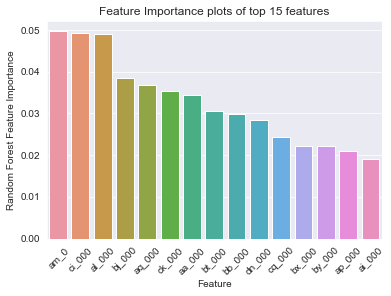

In [13]:
# plotting a bar graph for 15 most imporatnt features
sns.barplot(x=top15_ft, y=top15_imp)
plt.xlabel('Feature')
plt.ylabel("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.title("Feature Importance plots of top 15 features")
plt.show()

For univariate analysis of these features, we are going to plot the pdf, cdf and boxplots of each plot for both the classes.

In [8]:
def univariate_analysis(features):
    """
        This function takes a list of features and performs univariate analysis on them by plotting CDF, PDF, Boxplots and 
        printing mean, standard deviation and median for that feature.
    """
    for ft in features:
        print('---UNIVARIATE ANALYSIS OF', ft, '---')
        values = train_eda[ft]
        values0 = train_eda[train['class']=='neg'][ft]
        values1 = train_eda[train['class']=='pos'][ft]
        desc_neg = values0.describe() # for printing the mean and standard deviation values of the feature for individual classes
        desc_pos = values1.describe()

        print("FOR NEGATIVE CLASS:- 1. Mean:", round(desc_neg['mean'], 3), '2. Standard Deviation:', round(desc_neg['std'], 3), '3. Median:', round(desc_neg['50%'], 3))
        print("FOR POSITIVE CLASS:- 1. Mean:", round(desc_pos['mean'], 3), '2. Standard Deviation:', round(desc_pos['std'], 3), '3. Median:', round(desc_pos['50%'], 3))

        # plots
        fig, ax = plt.subplots(ncols=3, figsize=(18,6))
        sns.kdeplot(values0, ax=ax[0], shade=True, label='Neg')
        sns.kdeplot(values1, ax=ax[0], shade=True, label='Pos')
        sns.kdeplot(values0, ax=ax[1], cumulative=True, label='Neg')
        sns.kdeplot(values1, ax=ax[1], cumulative=True, label='Pos')
        sns.boxplot(data=train, x=Y, y=ft, ax=ax[2])

        ax[0].set_title('PDF of '+ft+' for Class 0')
        ax[1].set_title('CDF of '+ft)
        ax[2].set_title('Boxplot of '+ft)
        ax[0].legend()
        ax[1].legend()
        plt.show()
        print('-'*100)

---UNIVARIATE ANALYSIS OF am_0 ---
FOR NEGATIVE CLASS:- 1. Mean: 52350.513 2. Standard Deviation: 561483.153 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 2508199.666 2. Standard Deviation: 4281205.486 3. Median: 832493.0


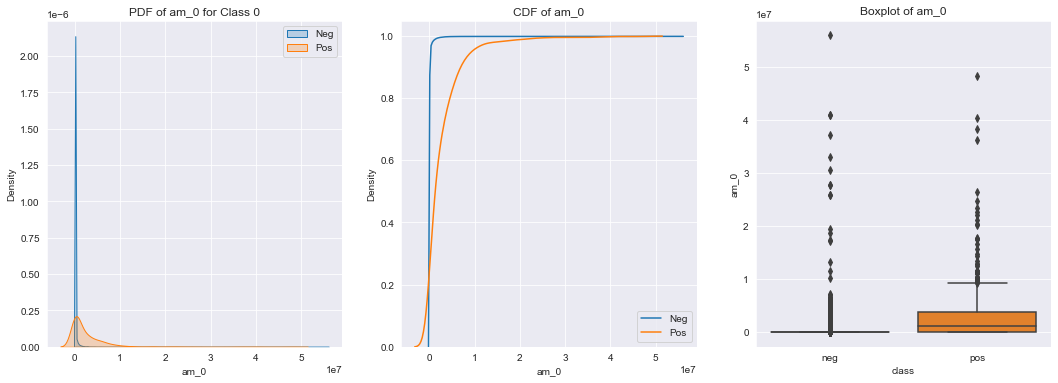

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ci_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 2883972.727 2. Standard Deviation: 6300400.986 3. Median: 1835520.96
FOR POSITIVE CLASS:- 1. Mean: 38717852.02 2. Standard Deviation: 23698494.525 3. Median: 35874037.92


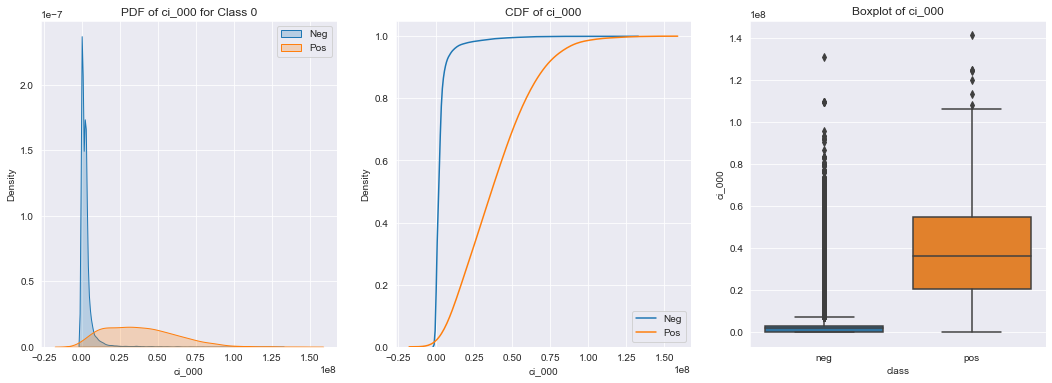

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF al_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 33567.768 2. Standard Deviation: 353106.375 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 1567330.194 2. Standard Deviation: 2759062.948 3. Median: 474311.0


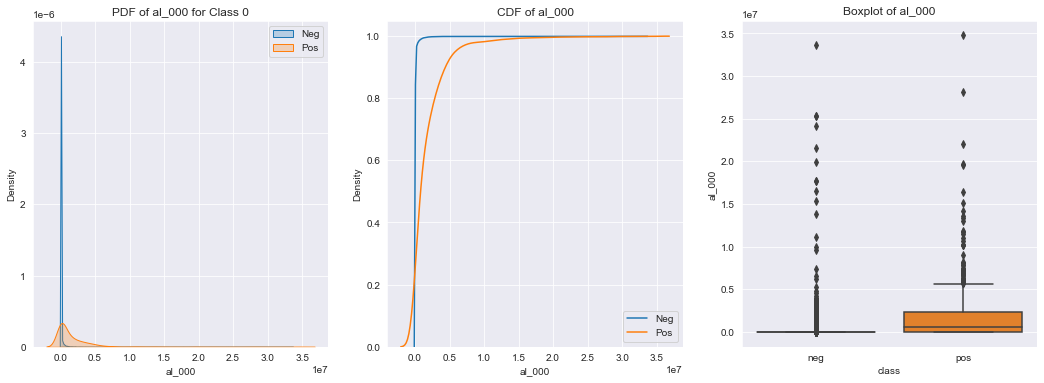

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF bj_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 388711.963 2. Standard Deviation: 1284258.843 3. Median: 152922.0
FOR POSITIVE CLASS:- 1. Mean: 7671348.035 2. Standard Deviation: 6884667.94 3. Median: 5851150.0


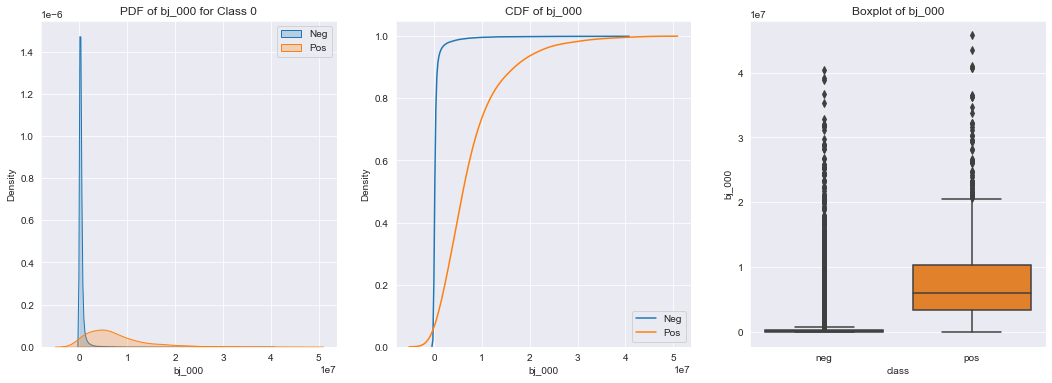

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF aq_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 357270.829 2. Standard Deviation: 924512.001 3. Median: 176465.0
FOR POSITIVE CLASS:- 1. Mean: 5465288.945 2. Standard Deviation: 4315457.484 3. Median: 4446850.0


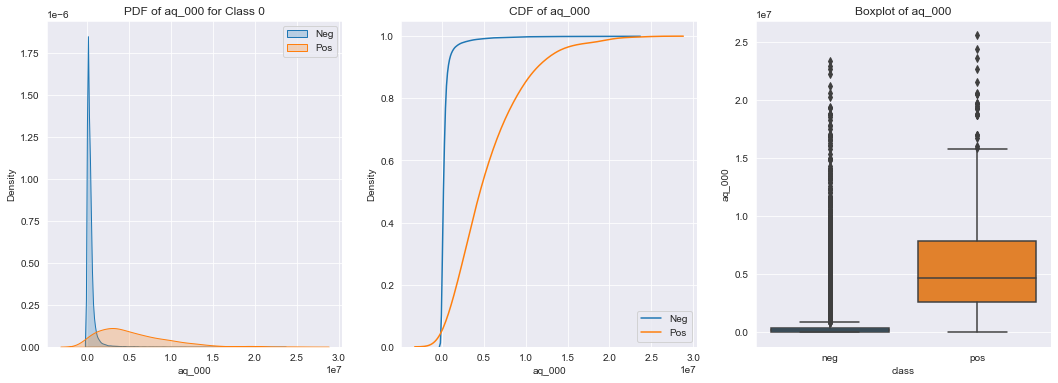

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ck_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 582876.323 2. Standard Deviation: 1742997.575 3. Median: 244897.92
FOR POSITIVE CLASS:- 1. Mean: 8470859.045 2. Standard Deviation: 6583121.449 3. Median: 6773784.0


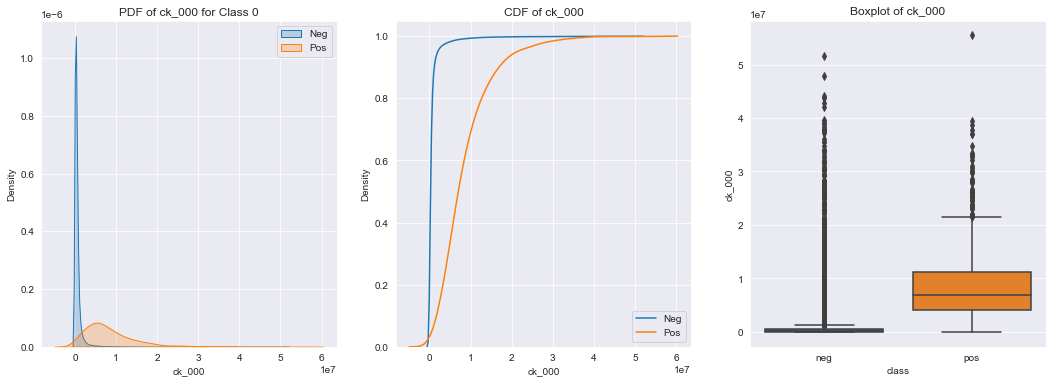

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF aa_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 49169.768 2. Standard Deviation: 110052.481 3. Median: 30416.0
FOR POSITIVE CLASS:- 1. Mean: 659173.664 2. Standard Deviation: 434383.878 3. Median: 584994.0


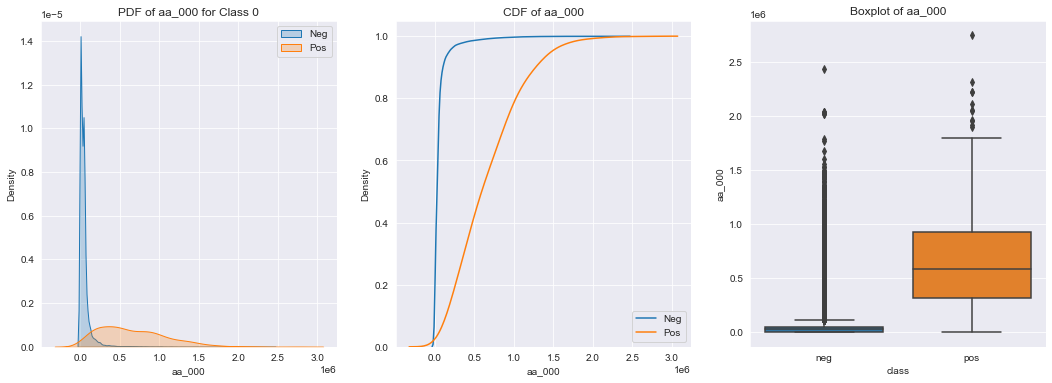

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF bt_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 49309.172 2. Standard Deviation: 109993.192 3. Median: 30534.895
FOR POSITIVE CLASS:- 1. Mean: 655749.089 2. Standard Deviation: 436436.763 3. Median: 580284.145


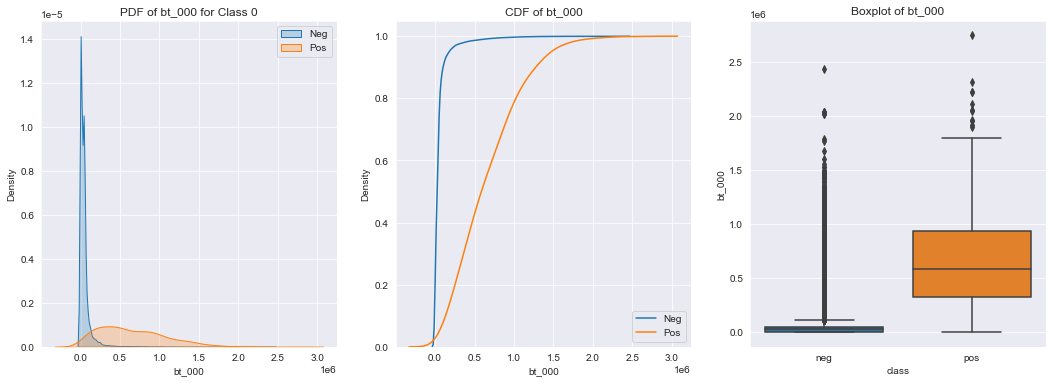

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF bb_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 3776735.757 2. Standard Deviation: 8260543.209 3. Median: 2346593.0
FOR POSITIVE CLASS:- 1. Mean: 48743221.605 2. Standard Deviation: 31961606.451 3. Median: 45718675.0


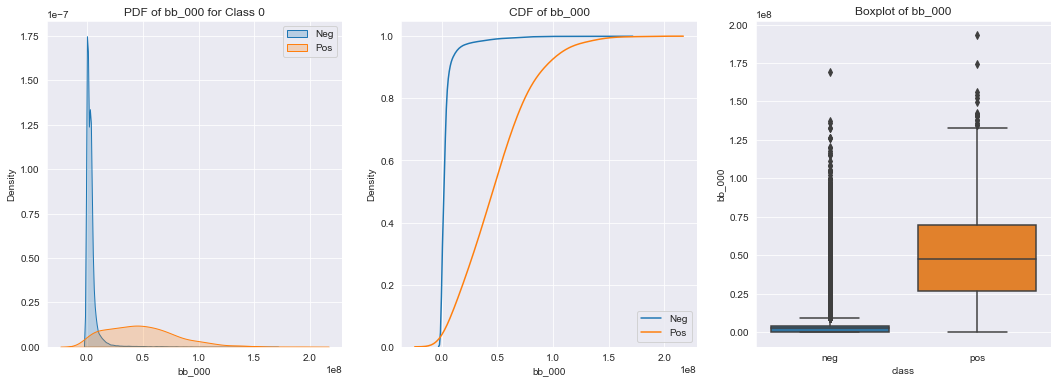

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF dn_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 27662.129 2. Standard Deviation: 76524.512 3. Median: 14232.0
FOR POSITIVE CLASS:- 1. Mean: 392661.679 2. Standard Deviation: 292401.03 3. Median: 344284.0


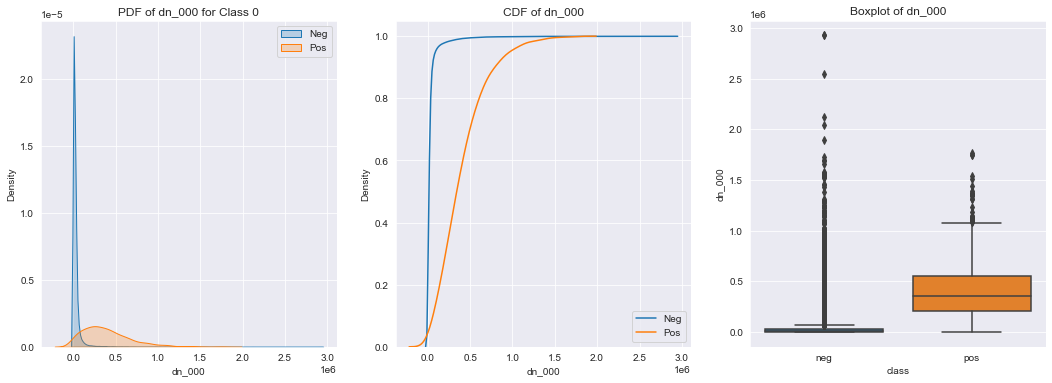

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF cq_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 3769985.317 2. Standard Deviation: 8246347.755 3. Median: 2347324.0
FOR POSITIVE CLASS:- 1. Mean: 48490377.08 2. Standard Deviation: 31890576.749 3. Median: 45604507.0


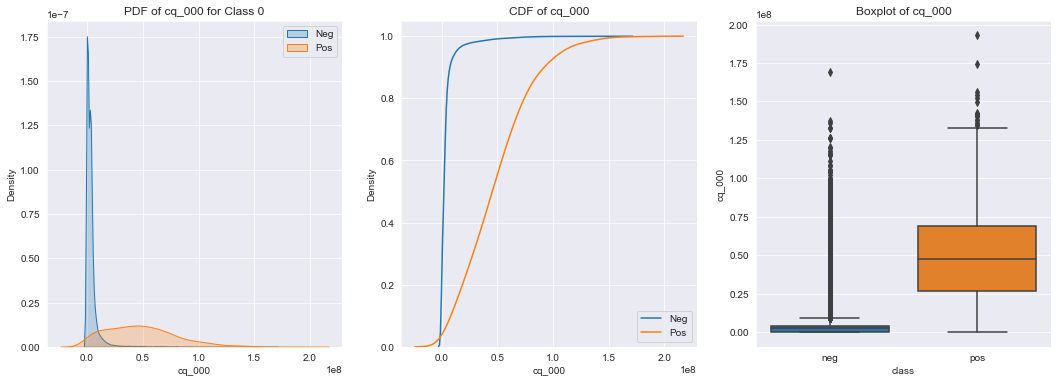

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF bx_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 3449974.984 2. Standard Deviation: 7673298.448 3. Median: 2387225.0
FOR POSITIVE CLASS:- 1. Mean: 43184561.783 2. Standard Deviation: 32478475.149 3. Median: 39714420.0


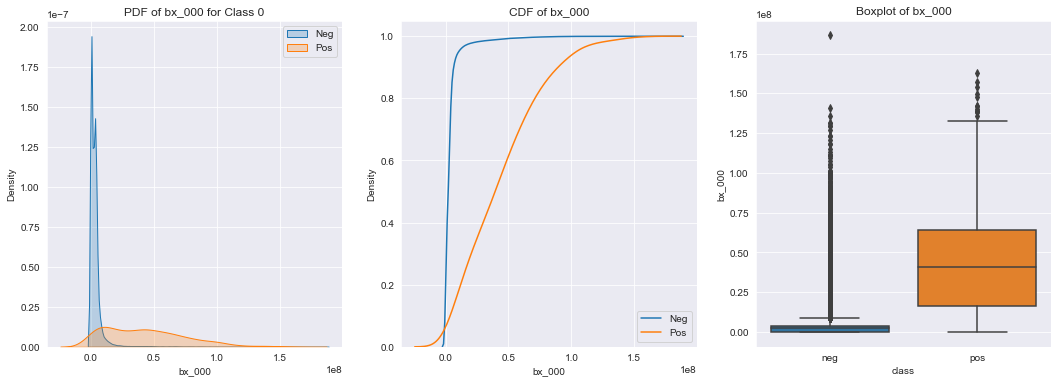

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF by_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 18527.873 2. Standard Deviation: 39482.549 3. Median: 12495.5
FOR POSITIVE CLASS:- 1. Mean: 228591.508 2. Standard Deviation: 195465.452 3. Median: 186392.5


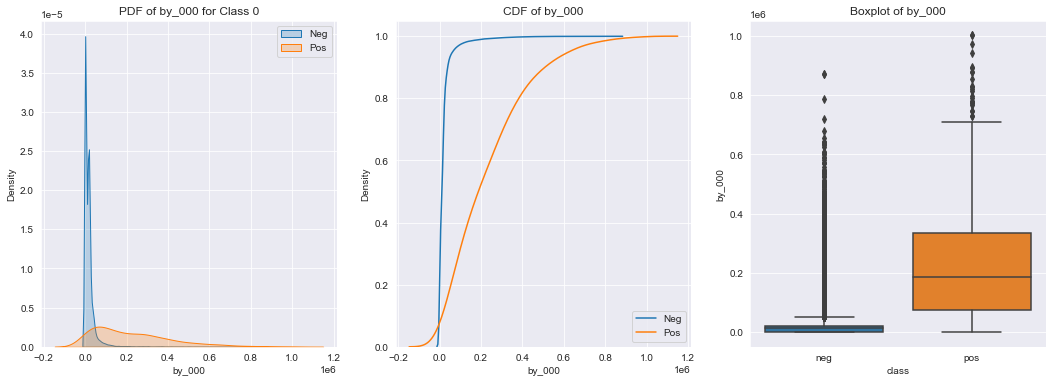

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ap_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 802336.573 2. Standard Deviation: 2310604.658 3. Median: 354038.0
FOR POSITIVE CLASS:- 1. Mean: 12911715.611 2. Standard Deviation: 10349169.432 3. Median: 10581399.0


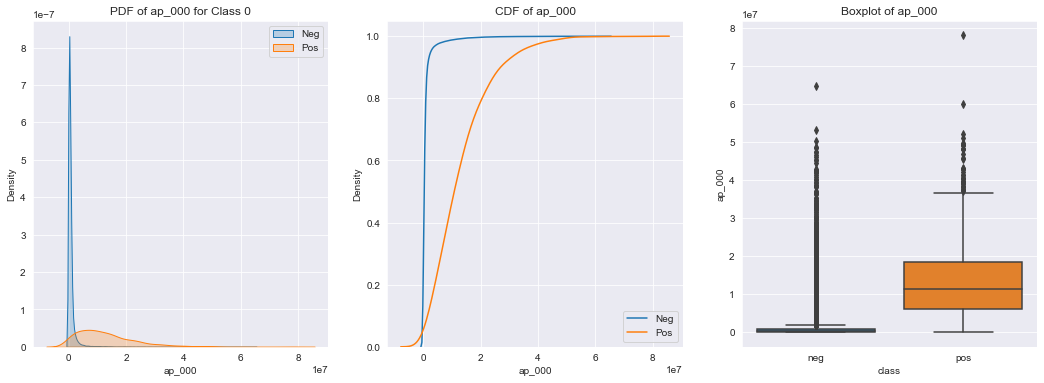

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ai_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 6511.216 2. Standard Deviation: 128906.144 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 156856.189 2. Standard Deviation: 762078.318 3. Median: 9016.965


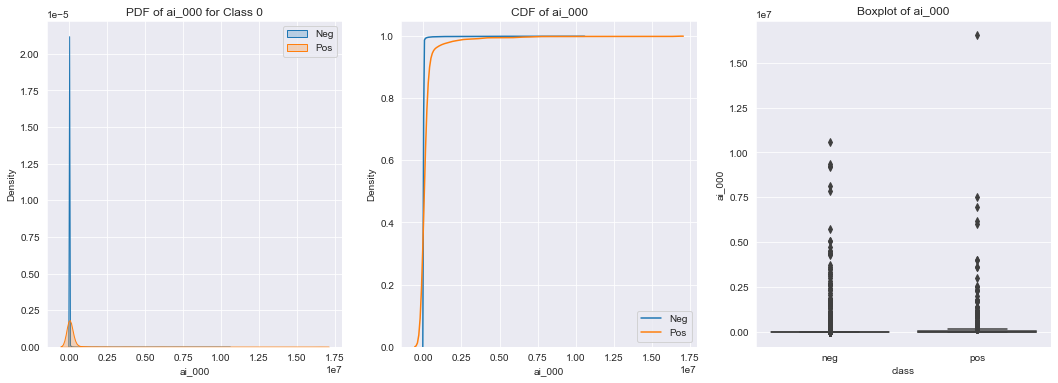

----------------------------------------------------------------------------------------------------


In [58]:
univariate_analysis(top15_ft)

__Observations from the univariate analysis of numerical features:__
<ul>
    <li>There is a general trend among most of the 15 features. The positive class values are much more spread compared to the negative class.The negative class has comparatively smaller spread as shown by its dense PDF and very steep CDF for most of the features.</li>
    <li>The means, standard deviations and medians all follow the above trend, with all the three values for all these features being very large, around 10 or 100 or sometimes even 1000 and more times of the negative class for the positive class.</li>
    <li>Features <b>ci_000, aq_000, bj_000, ck_000, aa_000, dn_000, cq_000, ap_000, by_000, bx_000, bt_000, bb_000</b> have separated IQRs for the positive class and negative class as shown in the boxplot. The CDFs and PDFs are also much more spread out for the positive class as compared to the negative class.</li>
    <li>For features, <b>ai_000, al_000 and am_0</b>, more than 95% of the datapoints have a value equal to or very close to 0 for the negative class.</li>
</ul>

#### Correlation analysis of the important features wrt the class labels

In [61]:
# changing pos and neg to numerical values
labels = []
for l in Y:
    if l=='neg':
        labels.append(0)
    else:
        labels.append(1)
# reappending class to the dataset
num_data['class'] = labels
# adding class to feature list
selected = top15_ft.tolist()
selected.append('class')

<ipython-input-61-ce5205d5e2bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['class'] = labels


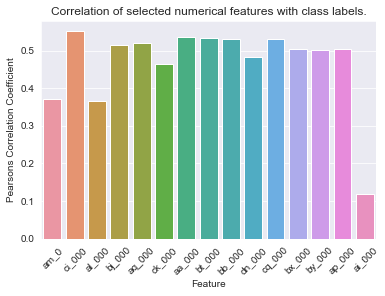

In [62]:
# getting the correlation of these features with class - pearson correlation has been used
corr = num_data[selected].corr()['class']
# plotting the correlations 
sns.barplot(x=corr.index[:-1], y=corr[:-1])
plt.xlabel('Feature')
plt.ylabel('Pearsons Correlation Coefficient')
plt.title("Correlation of selected numerical features with class labels.")
plt.xticks(rotation=45)
plt.show()

- Features __ci_000, aq_000, bj_000, ck_000, aa_000, dn_000, cq_000, ap_000, by_000, bx_000, bt_000, bb_000__ have a higher correlation around +0.5 which explains why the positive class datapoints had a higher positive values compared to negative class datapoints.
- The features __am_0, al_000 and ai_000__ that were having most of the values around 0 as seen from their univariate analysis have a smaller value of correlation less than 0.4. Feature __ai_000__ has the least correlation among all the features around 0.11-0.13.
- Lets get some more insights for the feature __ai_000__ by performing bivariate analysis on it with the other top features.

In [43]:
# for doing bivariate analysis, we are going to plot scatter plot between the features
def scatterplot_analysis(data, feature1, important_features):
    '''
        This function is used to plot scatterplots between a feature and other important features.
    '''
    for ft in important_features:
        if ft == feature1:
            continue
        print('---',feature1,'vs.', ft, '---')
        # plot the scatterplot
        sns.scatterplot(data=data, y=feature1, x=ft, hue='class')
        plt.title(feature1+'  vs. '+ft)
        plt.show()
        print('-'*100)

--- ai_000 vs. am_0 ---


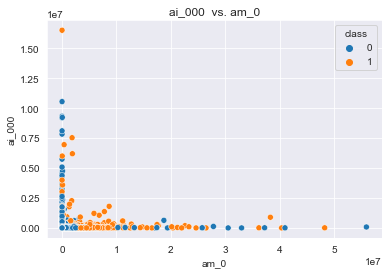

----------------------------------------------------------------------------------------------------
--- ai_000 vs. ci_000 ---


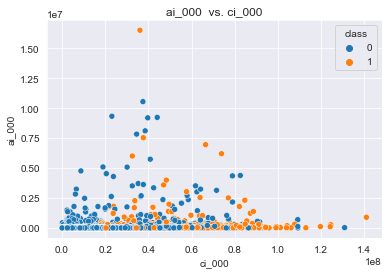

----------------------------------------------------------------------------------------------------
--- ai_000 vs. al_000 ---


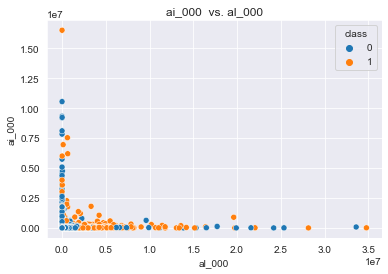

----------------------------------------------------------------------------------------------------
--- ai_000 vs. bj_000 ---


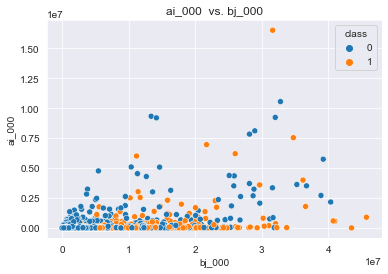

----------------------------------------------------------------------------------------------------
--- ai_000 vs. aq_000 ---


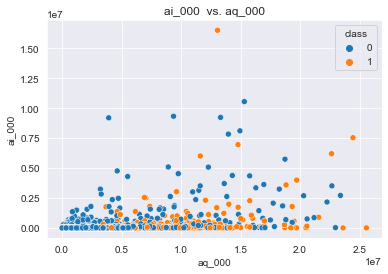

----------------------------------------------------------------------------------------------------
--- ai_000 vs. ck_000 ---


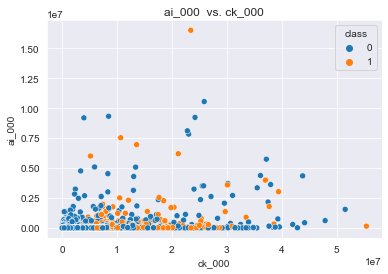

----------------------------------------------------------------------------------------------------
--- ai_000 vs. aa_000 ---


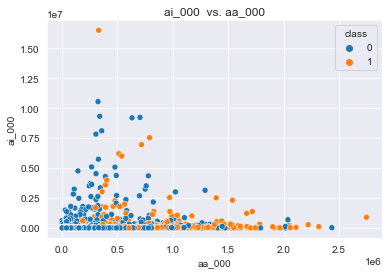

----------------------------------------------------------------------------------------------------
--- ai_000 vs. bt_000 ---


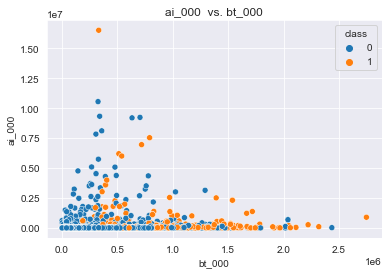

----------------------------------------------------------------------------------------------------
--- ai_000 vs. bb_000 ---


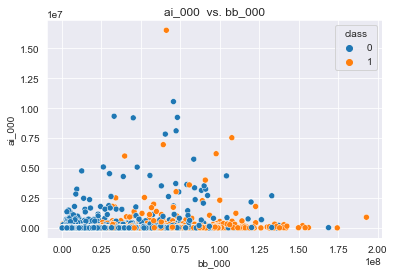

----------------------------------------------------------------------------------------------------
--- ai_000 vs. dn_000 ---


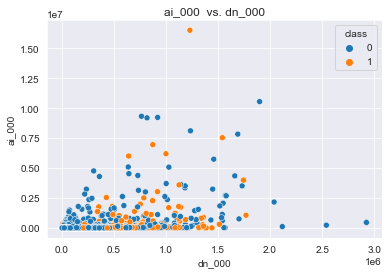

----------------------------------------------------------------------------------------------------
--- ai_000 vs. cq_000 ---


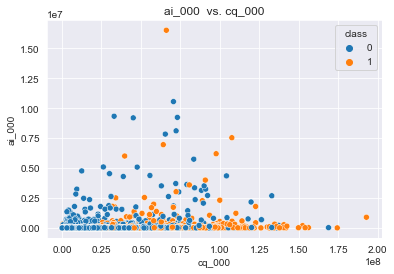

----------------------------------------------------------------------------------------------------
--- ai_000 vs. bx_000 ---


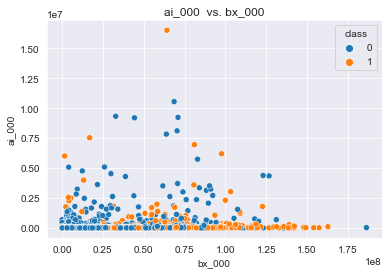

----------------------------------------------------------------------------------------------------
--- ai_000 vs. by_000 ---


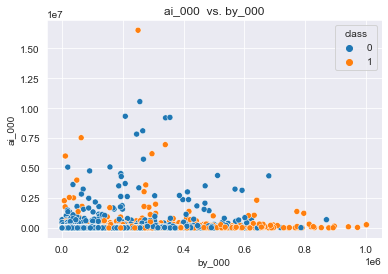

----------------------------------------------------------------------------------------------------
--- ai_000 vs. ap_000 ---


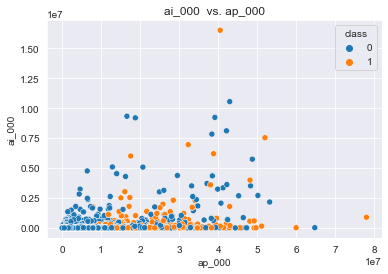

----------------------------------------------------------------------------------------------------


In [69]:
scatterplot_analysis(num_data, 'ai_000', top15_ft)

- For most of the datpoints, the feature __ai_000__ has a value equal to 0. There are some datapoints that have a nonzero value for both the classes.
- This feature can be used with other important features for prediction. The other features are trying to make a separation between the two classes on their own axis as it can be seen that for most of the plots the positive class (orange) points have higher values in the x axis as compared to negative class points.
___
#### Multivariate analysis for selected numrical features
We are going to plot a t-SNE plot using the important numerical features and see how well do they perform.

In [10]:
from sklearn.manifold import TSNE

In [73]:
tsne = TSNE(n_components=2, perplexity=50, verbose=10, n_jobs=-1)
transformed_50 = tsne.fit_transform(num_data[top15_ft])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.303s...
[t-SNE] Computed neighbors for 60000 samples in 2.251s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

C:\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


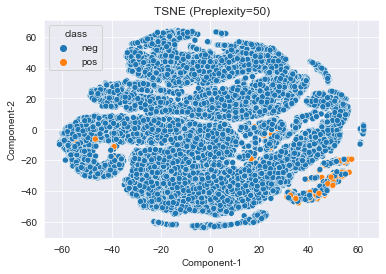

In [81]:
sns.scatterplot(transformed_50[:,0], transformed_50[:,1], hue=Y)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('TSNE (Preplexity=50)')
plt.show()

In [82]:
%%time
# with perplexity=100
tsne = TSNE(n_components=2, perplexity=100, verbose=10, n_jobs=-1)
transformed_100 = tsne.fit_transform(num_data[top15_ft])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.301s...
[t-SNE] Computed neighbors for 60000 samples in 3.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

C:\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


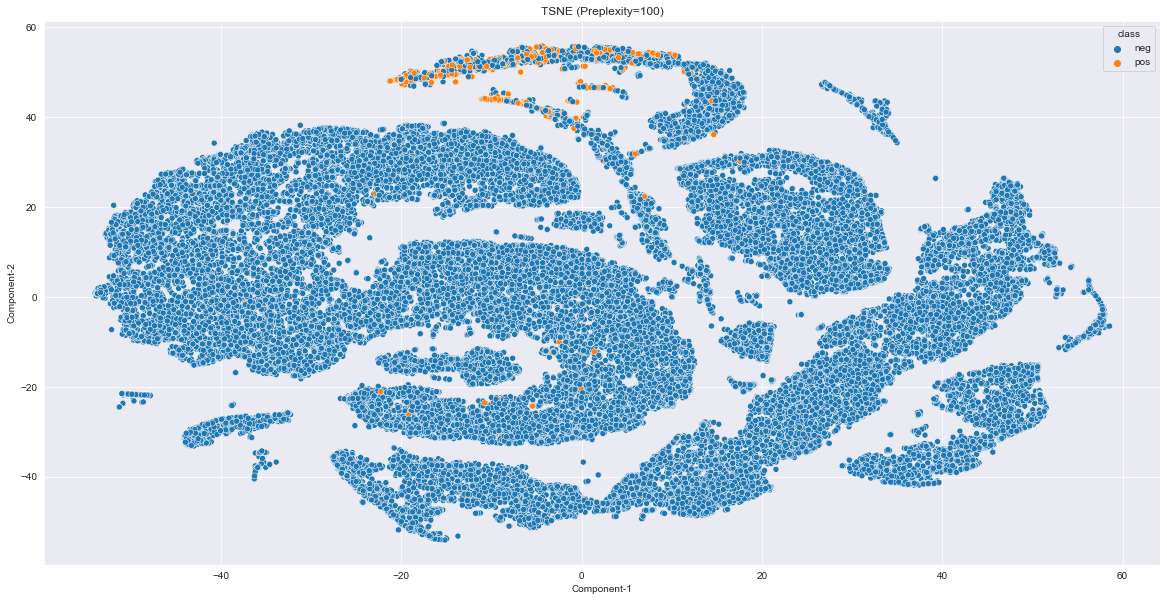

In [86]:
# plotting 
plt.figure(figsize=(20,10))
sns.scatterplot(transformed_100[:,0], transformed_100[:,1], hue=Y)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('TSNE (Preplexity=100)')
plt.show()

- The clusters are intermixed with each other with the positive datapoints being spread out in different locations.
- Because of the large number of negative class datapoints, the clusters of positive class are being overshadowed and hence are not visible clearly.

#### 5.2 Histogram Features
Now we are going to perform the same set of analyses on the histogram features and get some insights from them.

In [11]:
# looking at the histogram features
print("Histogram features:", hist_features)
print("Number of histogram features:", len(hist_features))

Histogram features: ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']
Number of histogram features: 70


In [12]:
hist_data = train_eda[hist_features]
print(hist_data.shape)
hist_data.head()

(60000, 70)


ag_000  ag_001  ag_002  ag_003   ag_004     ag_005     ag_006     ag_007  \
0     0.0     0.0     0.0     0.0  37250.0  1432864.0  3664156.0  1007684.0   
1     0.0     0.0     0.0     0.0  18254.0   653294.0  1720800.0   516724.0   
2     0.0     0.0     0.0     0.0   1648.0   370592.0  1883374.0   292936.0   
3     0.0     0.0     0.0   318.0   2212.0     3232.0     1872.0        0.0   
4     0.0     0.0     0.0     0.0  43752.0  1966618.0  1800340.0   131646.0   

    ag_008  ag_009  ...    ee_000     ee_001     ee_002    ee_003    ee_004  \
0  25896.0     0.0  ...  965866.0  1706908.0  1240520.0  493384.0  721044.0   
1  31642.0     0.0  ...  664504.0   824154.0   421400.0  178064.0  293306.0   
2  12016.0     0.0  ...  262032.0   453378.0   277378.0  159812.0  423992.0   
3      0.0     0.0  ...    5670.0     1566.0      240.0      46.0      58.0   
4   4588.0     0.0  ...  404740.0   904230.0   622012.0  229790.0  405298.0   

     ee_005    ee_006    ee_007    ee_008  ee_009  
0  469792.0  339156.0  157956.0   73224.0     0.0  
1  245416.0  133654.0   81140.0   97576.0  1500.0  
2  409564.0  320746.0  158022.0   95128.0   514.0  
3      44.0      10.0       0.0       0.0     0.0  
4  347188.0  286954.0  311560.0  433954.0  1218.0  

[5 rows x 70 columns]

In [13]:
# selecting top 15 histogram features
top15_hist, hist_imp = top_important_features(hist_data, Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200building tree 6 of 200

building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200building tree 11 of 200
building tree 12 of 200



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s


building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s


building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s


building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.3s


building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.9s


building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    3.6s


building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82 of 200
building tree 83 of 200
building tree 84 of 200
building tree 85 of 200
building tree 86 of 200


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s


building tree 87 of 200
building tree 88 of 200
building tree 89 of 200
building tree 90 of 200
building tree 91 of 200
building tree 92 of 200
building tree 93 of 200
building tree 94 of 200
building tree 95 of 200
building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    5.4s


building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200
building tree 108 of 200
building tree 109 of 200
building tree 110 of 200
building tree 111 of 200
building tree 112 of 200
building tree 113 of 200
building tree 114 of 200
building tree 115 of 200
building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.3s


building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200


[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    7.3s


building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200


[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.3s


building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200


[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    9.3s


building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200building tree 176 of 200

building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.5s


building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 198 out of 200 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.7s finished


In [14]:
print('The 15 most important histogram features are:', *top15_hist, sep=', ')

The 15 most important histogram features are:, ag_002, ee_005, cs_002, ag_003, ag_001, ba_000, cn_000, cn_001, ee_000, az_000, ba_003, ay_005, cs_004, ba_004, ay_006


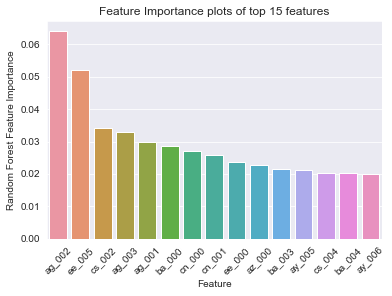

In [15]:
# plotting a bar graph for 15 most important features
sns.barplot(x=top15_hist, y=hist_imp)
plt.xlabel('Feature')
plt.ylabel("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.title("Feature Importance plots of top 15 features")
plt.show()

---UNIVARIATE ANALYSIS OF ag_002 ---
FOR NEGATIVE CLASS:- 1. Mean: 1991.281 2. Standard Deviation: 56800.436 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 398875.264 2. Standard Deviation: 998185.679 3. Median: 2265.0


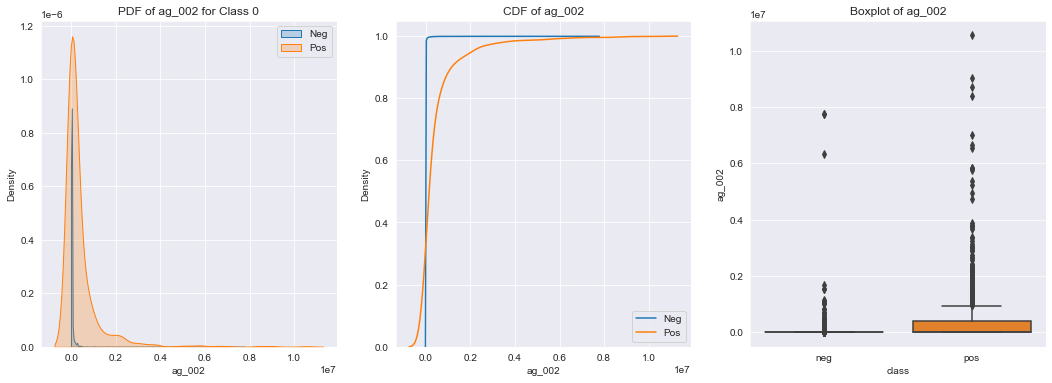

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ee_005 ---
FOR NEGATIVE CLASS:- 1. Mean: 323446.832 2. Standard Deviation: 664373.192 3. Median: 189565.0
FOR POSITIVE CLASS:- 1. Mean: 4553408.815 2. Standard Deviation: 5563705.508 3. Median: 2694827.0


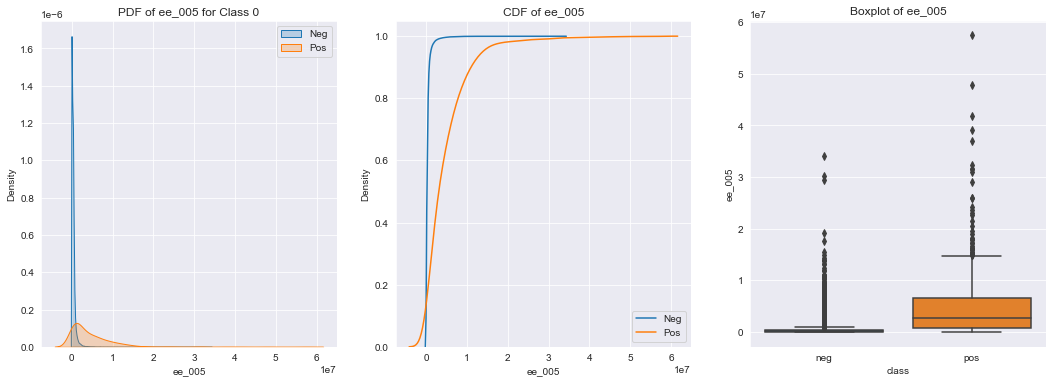

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF cs_002 ---
FOR NEGATIVE CLASS:- 1. Mean: 180222.862 2. Standard Deviation: 977351.313 3. Median: 20238.0
FOR POSITIVE CLASS:- 1. Mean: 3695489.809 2. Standard Deviation: 4378730.784 3. Median: 2408493.0


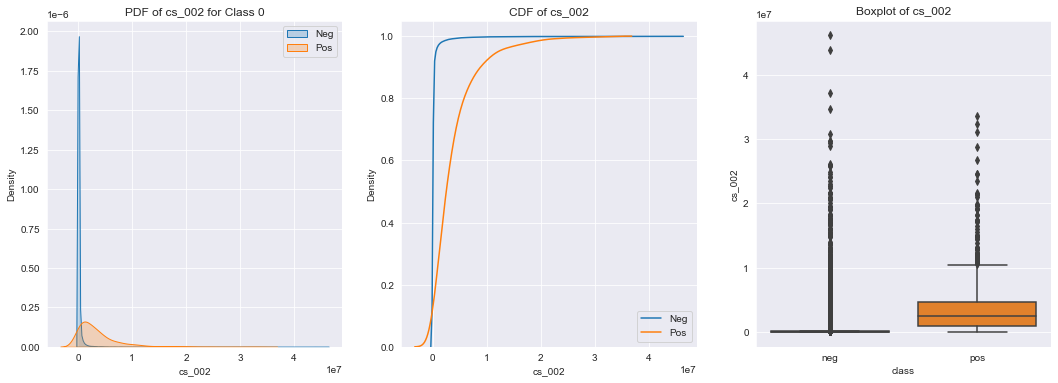

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ag_003 ---
FOR NEGATIVE CLASS:- 1. Mean: 45894.861 2. Standard Deviation: 411553.759 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 2607680.041 2. Standard Deviation: 4242137.954 3. Median: 385181.0


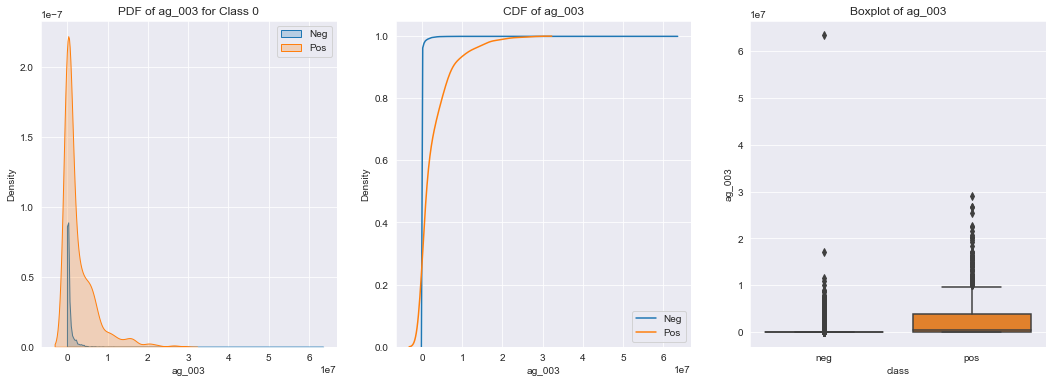

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ag_001 ---
FOR NEGATIVE CLASS:- 1. Mean: 129.809 2. Standard Deviation: 5200.192 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 50884.629 2. Standard Deviation: 255599.909 3. Median: 0.0


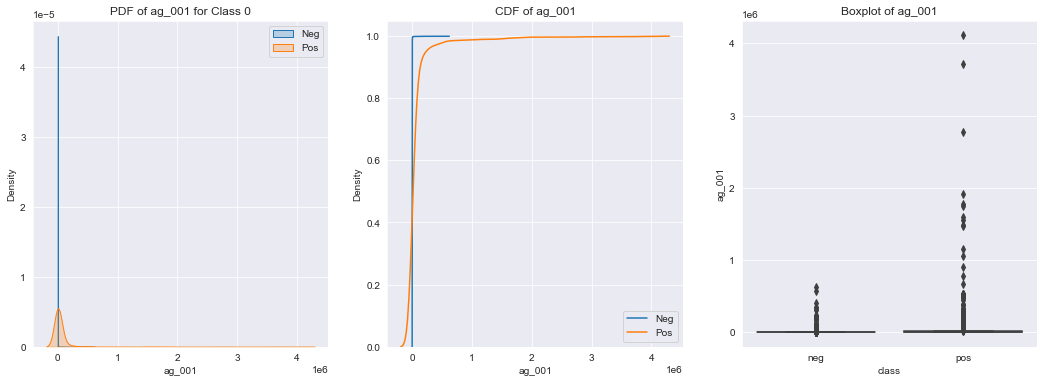

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ba_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 1189119.101 2. Standard Deviation: 3024388.39 3. Median: 676772.0
FOR POSITIVE CLASS:- 1. Mean: 13821090.418 2. Standard Deviation: 12236774.089 3. Median: 10915334.0


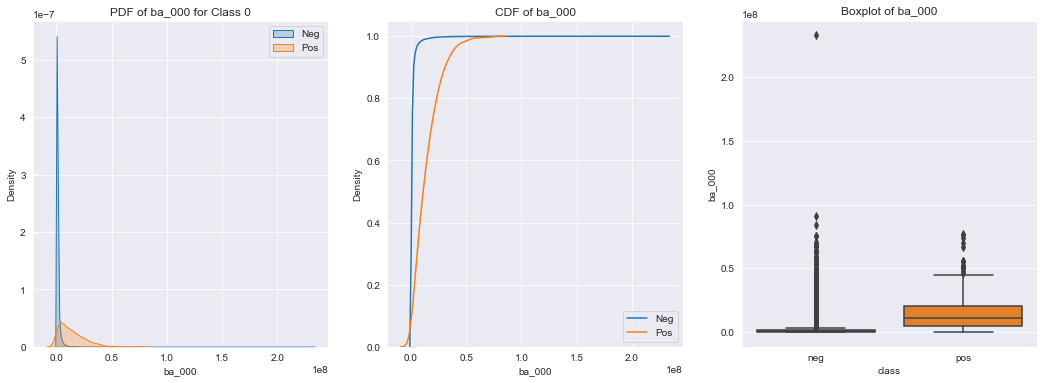

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF cn_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 500.964 2. Standard Deviation: 18327.106 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 110643.557 2. Standard Deviation: 436436.387 3. Median: 0.0


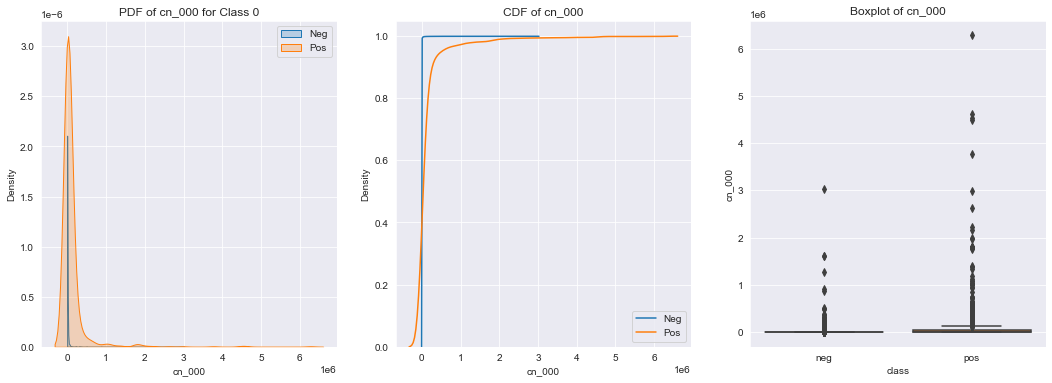

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF cn_001 ---
FOR NEGATIVE CLASS:- 1. Mean: 9523.673 2. Standard Deviation: 102488.126 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 755192.916 2. Standard Deviation: 1555449.095 3. Median: 43133.0


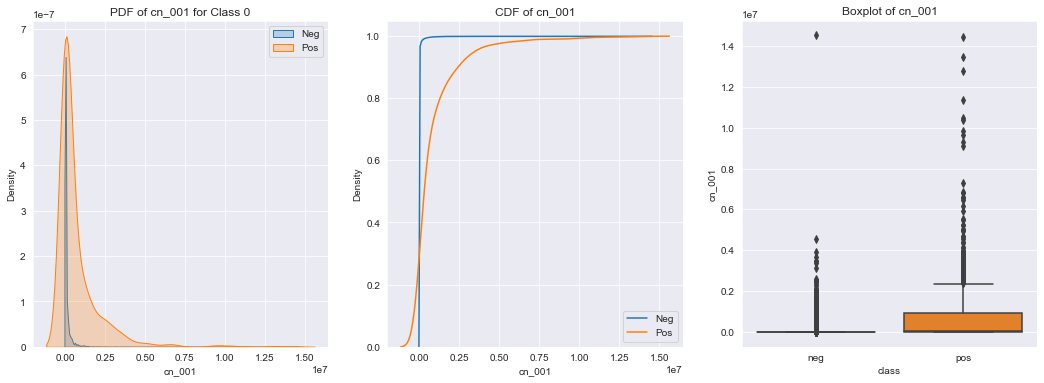

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ee_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 603528.949 2. Standard Deviation: 1884792.145 3. Median: 258855.0
FOR POSITIVE CLASS:- 1. Mean: 8396044.801 2. Standard Deviation: 8782011.878 3. Median: 5941424.0


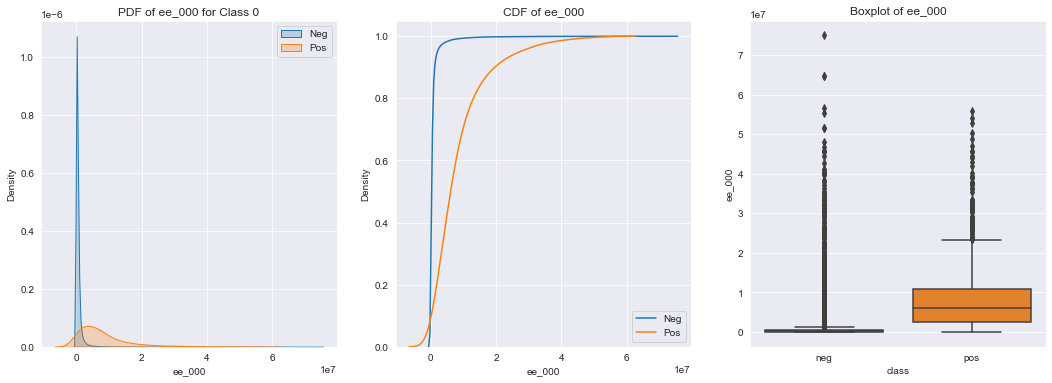

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF az_000 ---
FOR NEGATIVE CLASS:- 1. Mean: 5925.527 2. Standard Deviation: 48452.779 3. Median: 2090.0
FOR POSITIVE CLASS:- 1. Mean: 121370.378 2. Standard Deviation: 412617.374 3. Median: 48063.0


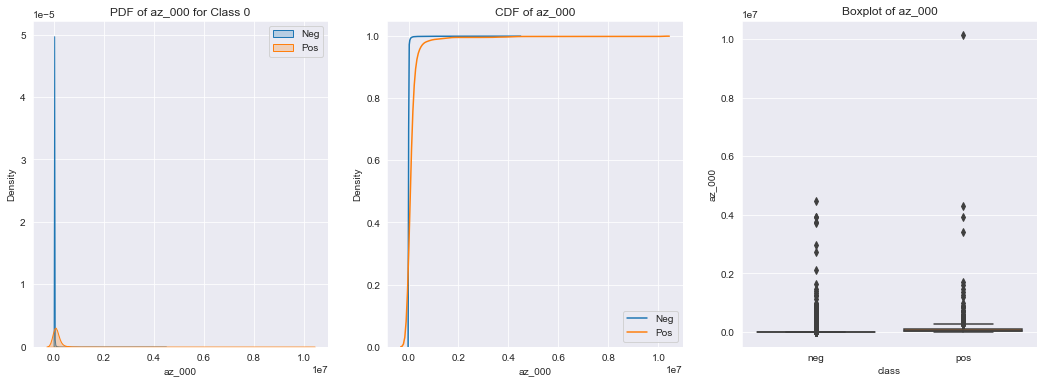

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ba_003 ---
FOR NEGATIVE CLASS:- 1. Mean: 229501.853 2. Standard Deviation: 568433.427 3. Median: 133452.0
FOR POSITIVE CLASS:- 1. Mean: 2899808.166 2. Standard Deviation: 2676654.582 3. Median: 2223495.0


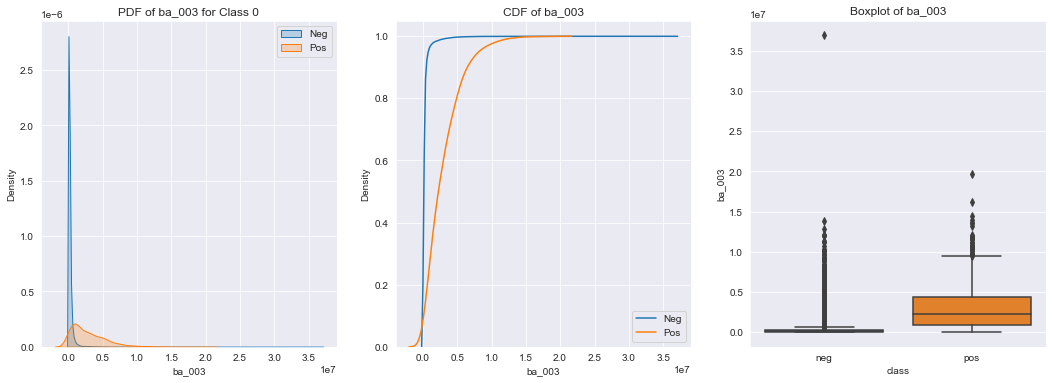

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ay_005 ---
FOR NEGATIVE CLASS:- 1. Mean: 73693.549 2. Standard Deviation: 923947.064 3. Median: 0.0
FOR POSITIVE CLASS:- 1. Mean: 2370827.448 2. Standard Deviation: 7738861.611 3. Median: 0.0


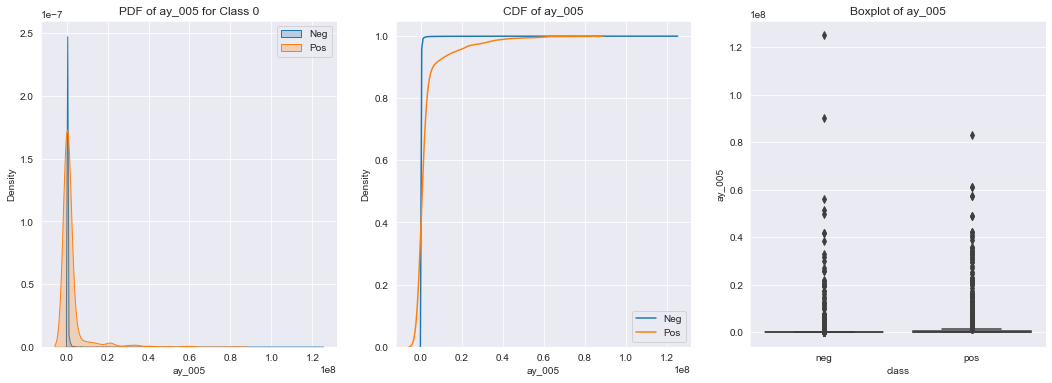

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF cs_004 ---
FOR NEGATIVE CLASS:- 1. Mean: 326781.71 2. Standard Deviation: 1407083.091 3. Median: 90420.0
FOR POSITIVE CLASS:- 1. Mean: 7373575.721 2. Standard Deviation: 9467830.045 3. Median: 4148097.0


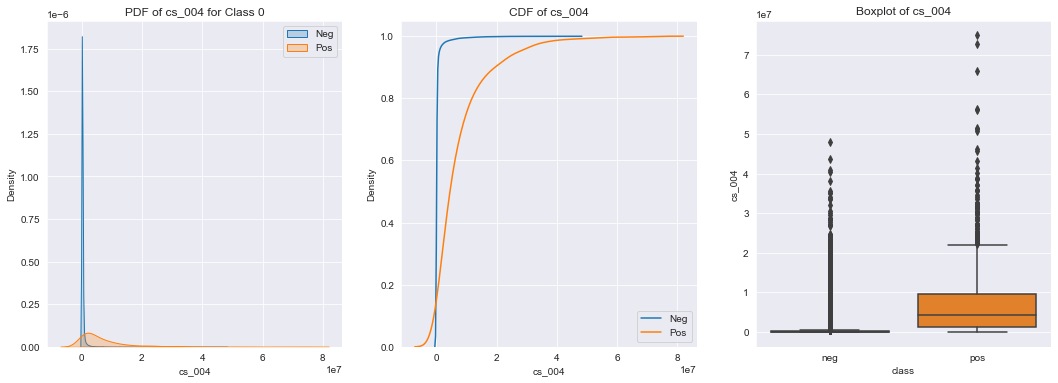

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ba_004 ---
FOR NEGATIVE CLASS:- 1. Mean: 171542.931 2. Standard Deviation: 390984.922 3. Median: 101486.0
FOR POSITIVE CLASS:- 1. Mean: 2171501.868 2. Standard Deviation: 2070461.298 3. Median: 1537478.0


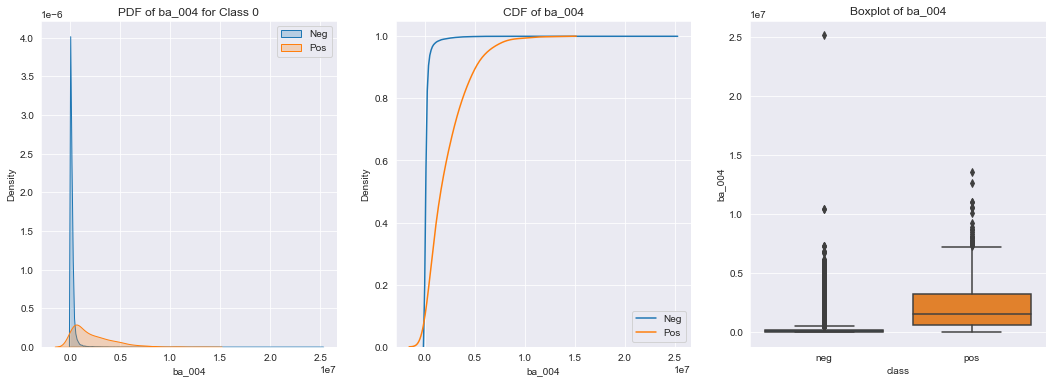

----------------------------------------------------------------------------------------------------
---UNIVARIATE ANALYSIS OF ay_006 ---
FOR NEGATIVE CLASS:- 1. Mean: 980038.855 2. Standard Deviation: 2701313.109 3. Median: 184151.0
FOR POSITIVE CLASS:- 1. Mean: 6890779.524 2. Standard Deviation: 13159021.594 3. Median: 105650.0


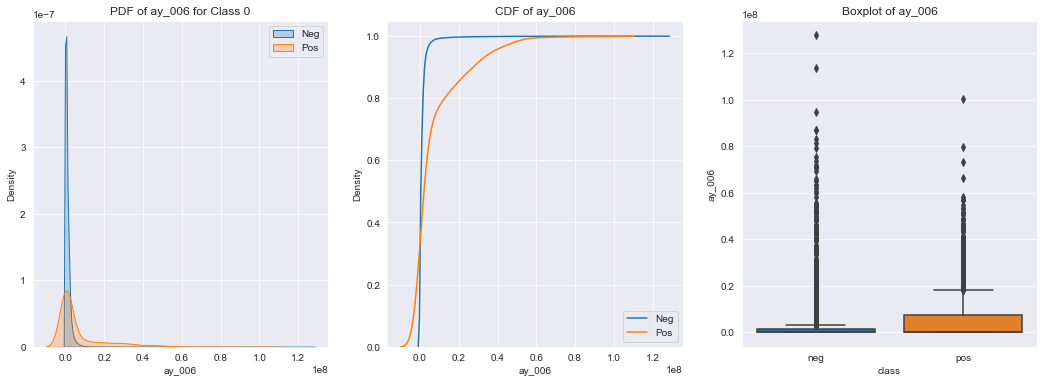

----------------------------------------------------------------------------------------------------


In [16]:
# doing univariate analysis
univariate_analysis(top15_hist)

__Observations from the univariate analysis plots:__
- The same trend is being followed in the case of histogram features as well. The datpoints of positive class in general have larger means, medians and standard deviations and have a much higher spread compared to the negative class datapoints.
- For features __ag_002, ag_001, cn_000, cn_001, az_000 and ay_005__ have more than 95% of the features with very small values (comparatively) for the negative class.
- Furthermore, features __ag_002, ag_003, ag_001, cn_000, cn_001 and ay_005__ have a median value of 0, showing that atleast 50% of values are equal to 0 for the negative class.
- From the importances plot, we can see that the most important features were less than or equal to 0.03 while only two features i.e., __ag_002 and ee_005__ have values more than 0.06 and 0.05 respectively.
___
#### Correlation analysis of the important features with class labels.
We are going to use Pearson's correlation coefficient for this analysis.

In [35]:
selected = train[top15_hist]
selected['class'] = [0 if i=='neg' else 1 for i in train['class']]
print(selected.shape)
selected.head()

(60000, 16)


<ipython-input-35-576d50a38631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['class'] = [0 if i=='neg' else 1 for i in train['class']]


ag_002    ee_005    cs_002  ag_003  ag_001     ba_000  cn_000  cn_001  \
0     0.0  469792.0  267998.0     0.0     0.0  2328746.0     0.0     0.0   
1     0.0  245416.0  164860.0     0.0     0.0  1378576.0     0.0     0.0   
2     0.0  409564.0   56362.0     0.0     0.0   790690.0     0.0     0.0   
3     0.0      44.0      24.0   318.0     0.0     6176.0     0.0    52.0   
4     0.0  347188.0   80950.0     0.0     0.0  1348578.0     0.0     0.0   

     ee_000  az_000    ba_003    ay_005    cs_004    ba_004     ay_006  class  
0  965866.0  5374.0  287230.0  469014.0  428776.0  310246.0  4239660.0      0  
1  664504.0  7336.0  154298.0   71510.0  272956.0  137280.0   772720.0      0  
2  262032.0  1620.0  254892.0       0.0  100326.0  189596.0   870456.0      0  
3    5670.0    64.0     102.0       0.0     692.0      74.0        0.0      0  
4  404740.0  1644.0  236540.0  372236.0  186242.0  182278.0  2128914.0      0

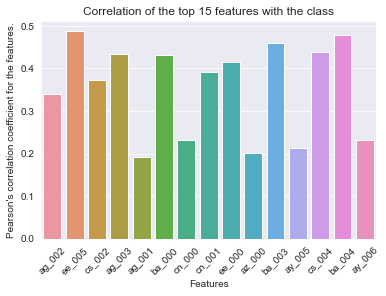

In [42]:
# plotting the correlatins wrt class
correlations = selected.corr()['class']
# plotting the bar plot
sns.barplot(x=correlations.index[:-1], y=correlations[:-1])
plt.xlabel('Features')
plt.ylabel("Pearson's correlation coefficient for the features.")
plt.title('Correlation of the top 15 features with the class')
plt.xticks(rotation=45)
plt.show()

- Features __ee_005, ag_003, ba_000, cn_001, ee_000, ba_003, cs_004 and ba_004__ have correlation of more than or equal to 0.4.
- __ee_005__ has the highest correlation coefficient value of around 0.49.
- __ag_001 and az_000__ have the lowest correlation coefficient value of around 0.18 and 0.2 respectively.
___

#### Bivariate Analysis
Let us do a bivariate analysis of the least correlated feature, i.e., ag_001. For this, we are going to plot the scatterplot of the feature with all the other important features.

--- ag_001 vs. ag_002 ---


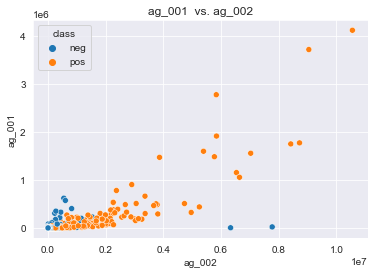

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ee_005 ---


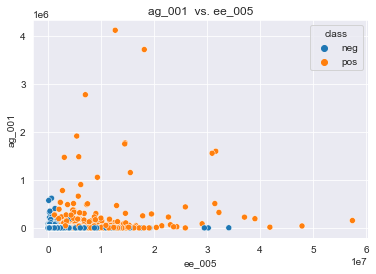

----------------------------------------------------------------------------------------------------
--- ag_001 vs. cs_002 ---


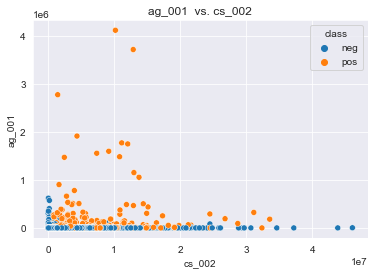

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ag_003 ---


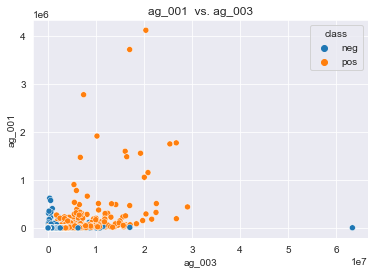

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ba_000 ---


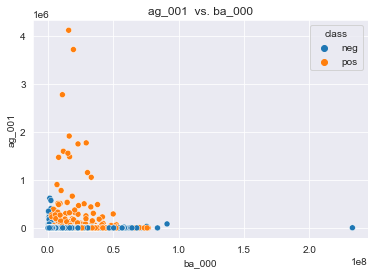

----------------------------------------------------------------------------------------------------
--- ag_001 vs. cn_000 ---


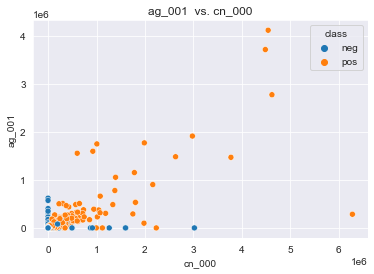

----------------------------------------------------------------------------------------------------
--- ag_001 vs. cn_001 ---


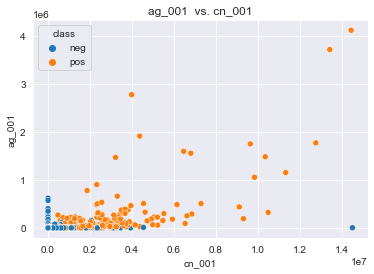

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ee_000 ---


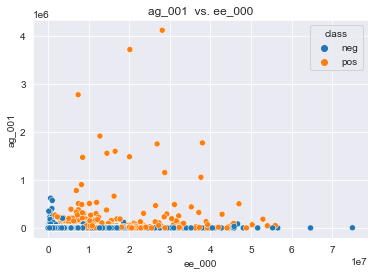

----------------------------------------------------------------------------------------------------
--- ag_001 vs. az_000 ---


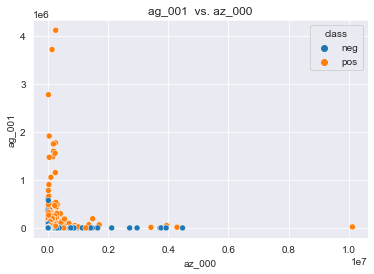

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ba_003 ---


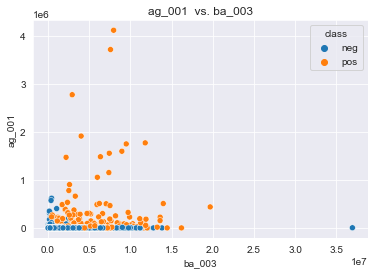

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ay_005 ---


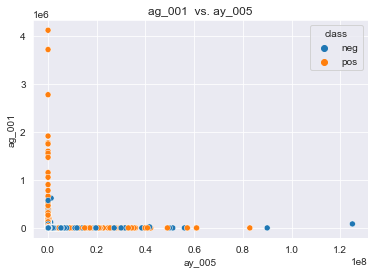

----------------------------------------------------------------------------------------------------
--- ag_001 vs. cs_004 ---


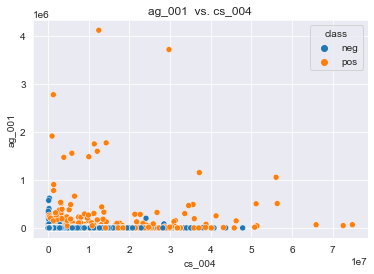

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ba_004 ---


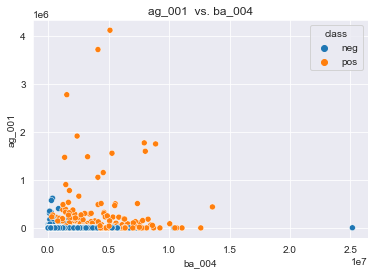

----------------------------------------------------------------------------------------------------
--- ag_001 vs. ay_006 ---


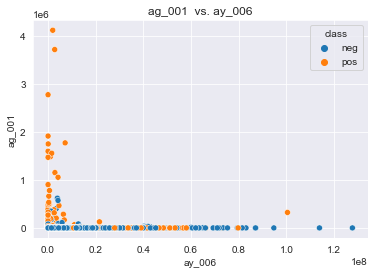

----------------------------------------------------------------------------------------------------


In [44]:
scatterplot_analysis(train, 'ag_001', top15_hist)

- Most of the values for __ag_001__ are relatively small for all the datapoints.
- The larger values of this feature are all for the positive class.

--- az_000 vs. ag_002 ---


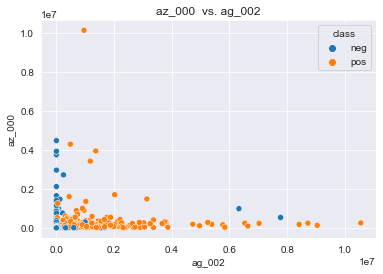

----------------------------------------------------------------------------------------------------
--- az_000 vs. ee_005 ---


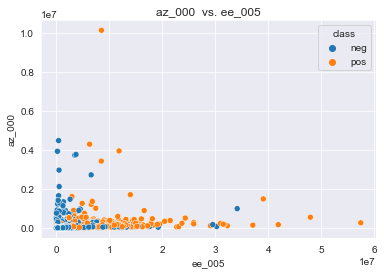

----------------------------------------------------------------------------------------------------
--- az_000 vs. cs_002 ---


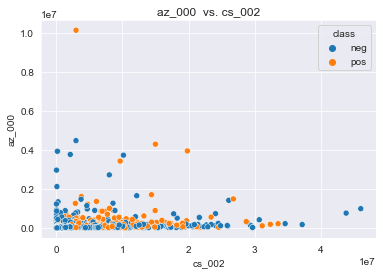

----------------------------------------------------------------------------------------------------
--- az_000 vs. ag_003 ---


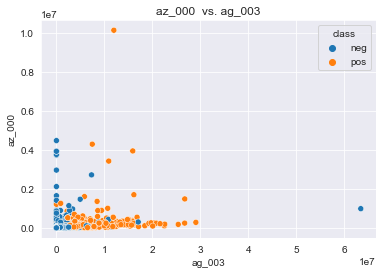

----------------------------------------------------------------------------------------------------
--- az_000 vs. ag_001 ---


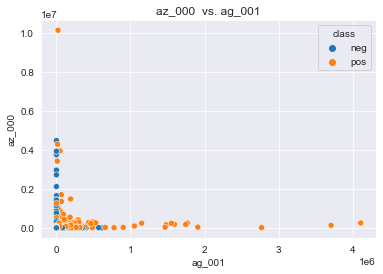

----------------------------------------------------------------------------------------------------
--- az_000 vs. ba_000 ---


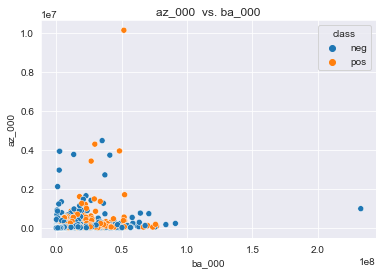

----------------------------------------------------------------------------------------------------
--- az_000 vs. cn_000 ---


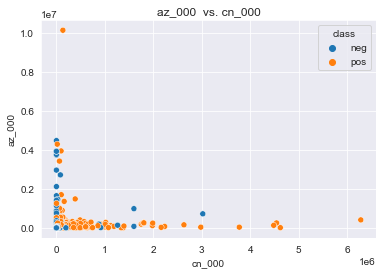

----------------------------------------------------------------------------------------------------
--- az_000 vs. cn_001 ---


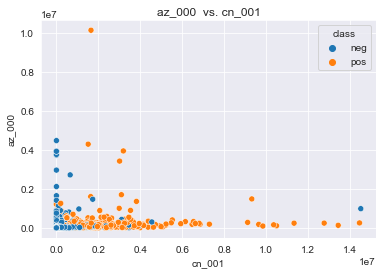

----------------------------------------------------------------------------------------------------
--- az_000 vs. ee_000 ---


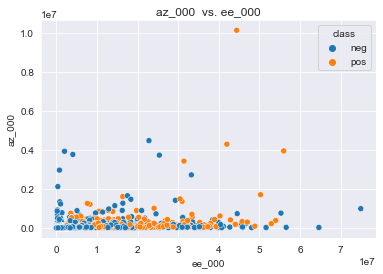

----------------------------------------------------------------------------------------------------
--- az_000 vs. ba_003 ---


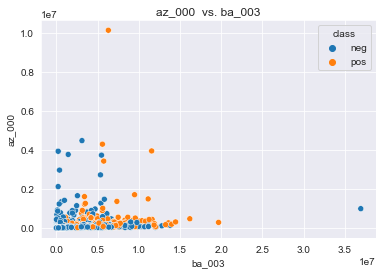

----------------------------------------------------------------------------------------------------
--- az_000 vs. ay_005 ---


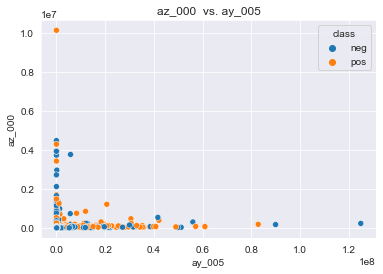

----------------------------------------------------------------------------------------------------
--- az_000 vs. cs_004 ---


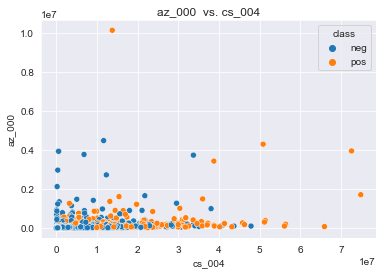

----------------------------------------------------------------------------------------------------
--- az_000 vs. ba_004 ---


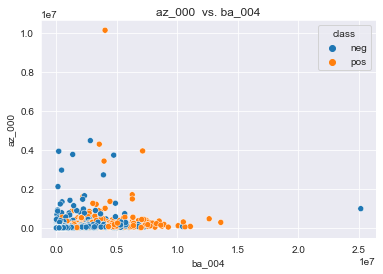

----------------------------------------------------------------------------------------------------
--- az_000 vs. ay_006 ---


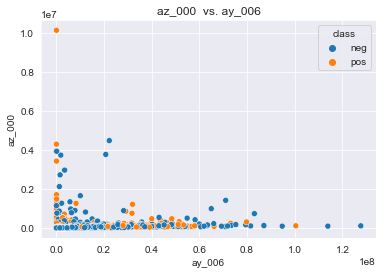

----------------------------------------------------------------------------------------------------


In [45]:
scatterplot_analysis(train, 'az_000', top15_hist)

- The feature __az_000__ has a lot of intersection for both the classes.
- For this feature too, most of the values are small. 
- Making a prediction using only this feature will have a very poor performance. 
___
#### Multivariate Analysis for selected histogram features
Here, we will use t-SNE to analyse how good are the selected 15 features in separating both the classes from each other.

In [6]:
from sklearn.manifold import TSNE

In [19]:
# perplexity - 50
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1, verbose=10)
# fitting the selected features
transformed_50 = tsne.fit_transform(hist_data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.005s...
[t-SNE] Computed neighbors for 60000 samples in 101.573s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

C:\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


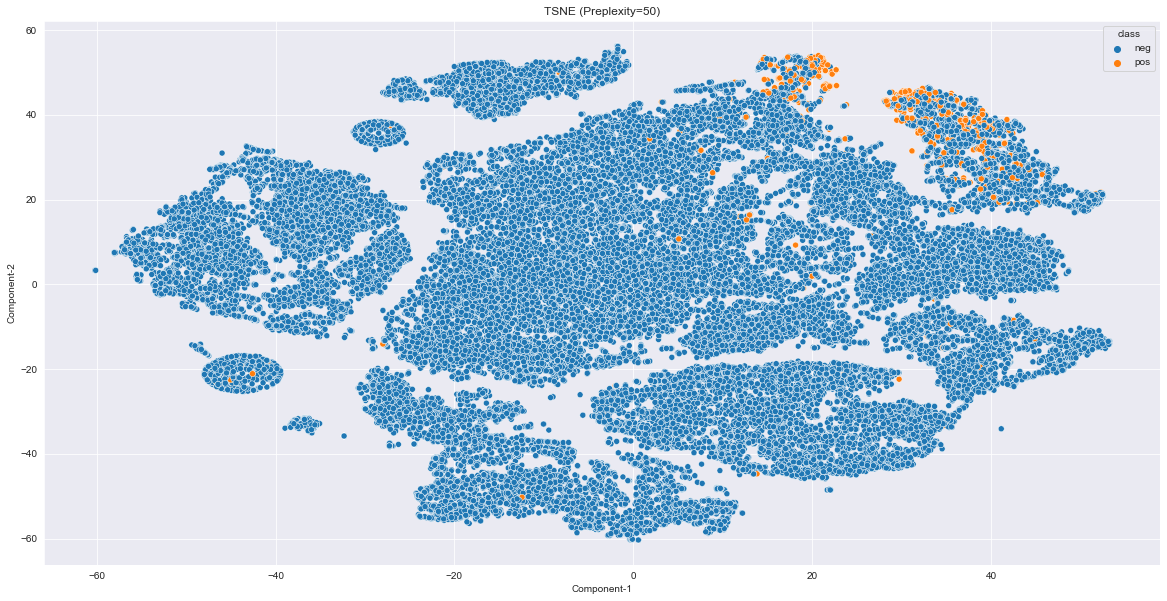

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(transformed_50[:,0], transformed_50[:,1], hue=Y)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('TSNE (Preplexity=50)')
plt.show()

In [21]:
# perplexity - 100
tsne = TSNE(n_components=2, perplexity=100, n_jobs=-1, verbose=10)
# fitting the selected features
transformed_100 = tsne.fit_transform(hist_data)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.004s...
[t-SNE] Computed neighbors for 60000 samples in 103.251s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

C:\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


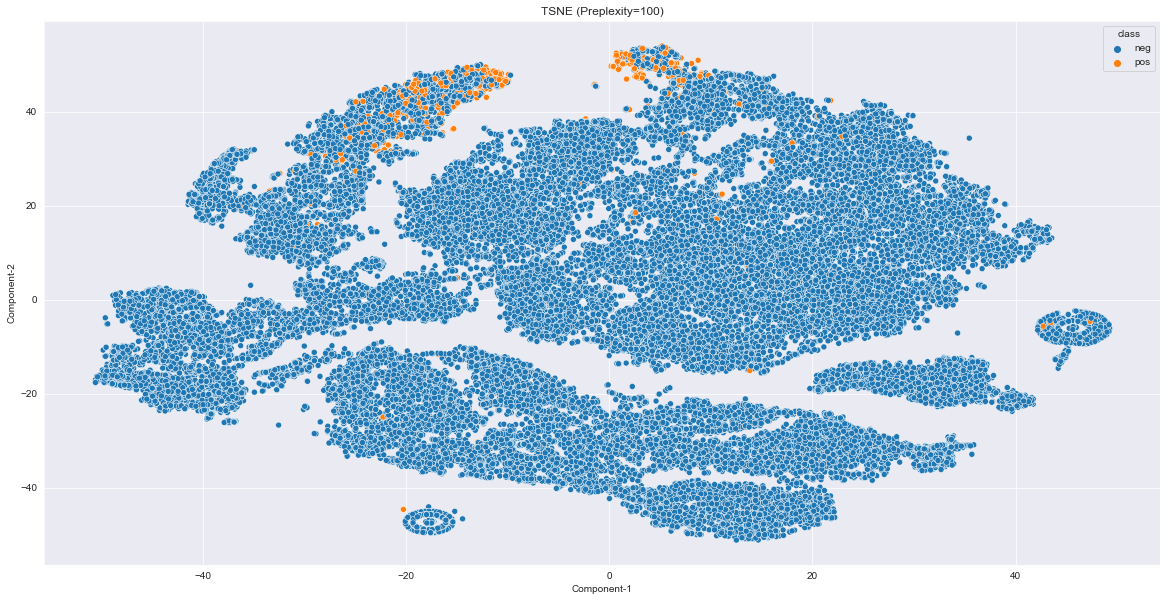

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(transformed_100[:,0], transformed_100[:,1], hue=Y)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('TSNE (Preplexity=100)')
plt.show()

- The t_SNE plot of the selected histogram features too behave similarly to the t-SNE plots of the numerical features.
- The data is well clustered. However, differentiating between both the classes in 2D is almost impossible as their clusters are intersecting a lot.
- Due to very high numbers of the negative class datapoints, it becomes even harder to see the positive class clusters.
- However, it looks like there is a high density of positive class datapoints on the top side of the graph but they too are intersecting with the negative class datapoints.

#### 5.3. MULTIVARIATE ANALYSIS OF ALL THE FEATURES IN THE DATASET.
Now we are going to perform multivariate analysis by using all the features together and get some insights. For this, we are going to plot the t-SNE plot and a heatmap of the correlation of the features among them and the with the class labels.

<AxesSubplot:>

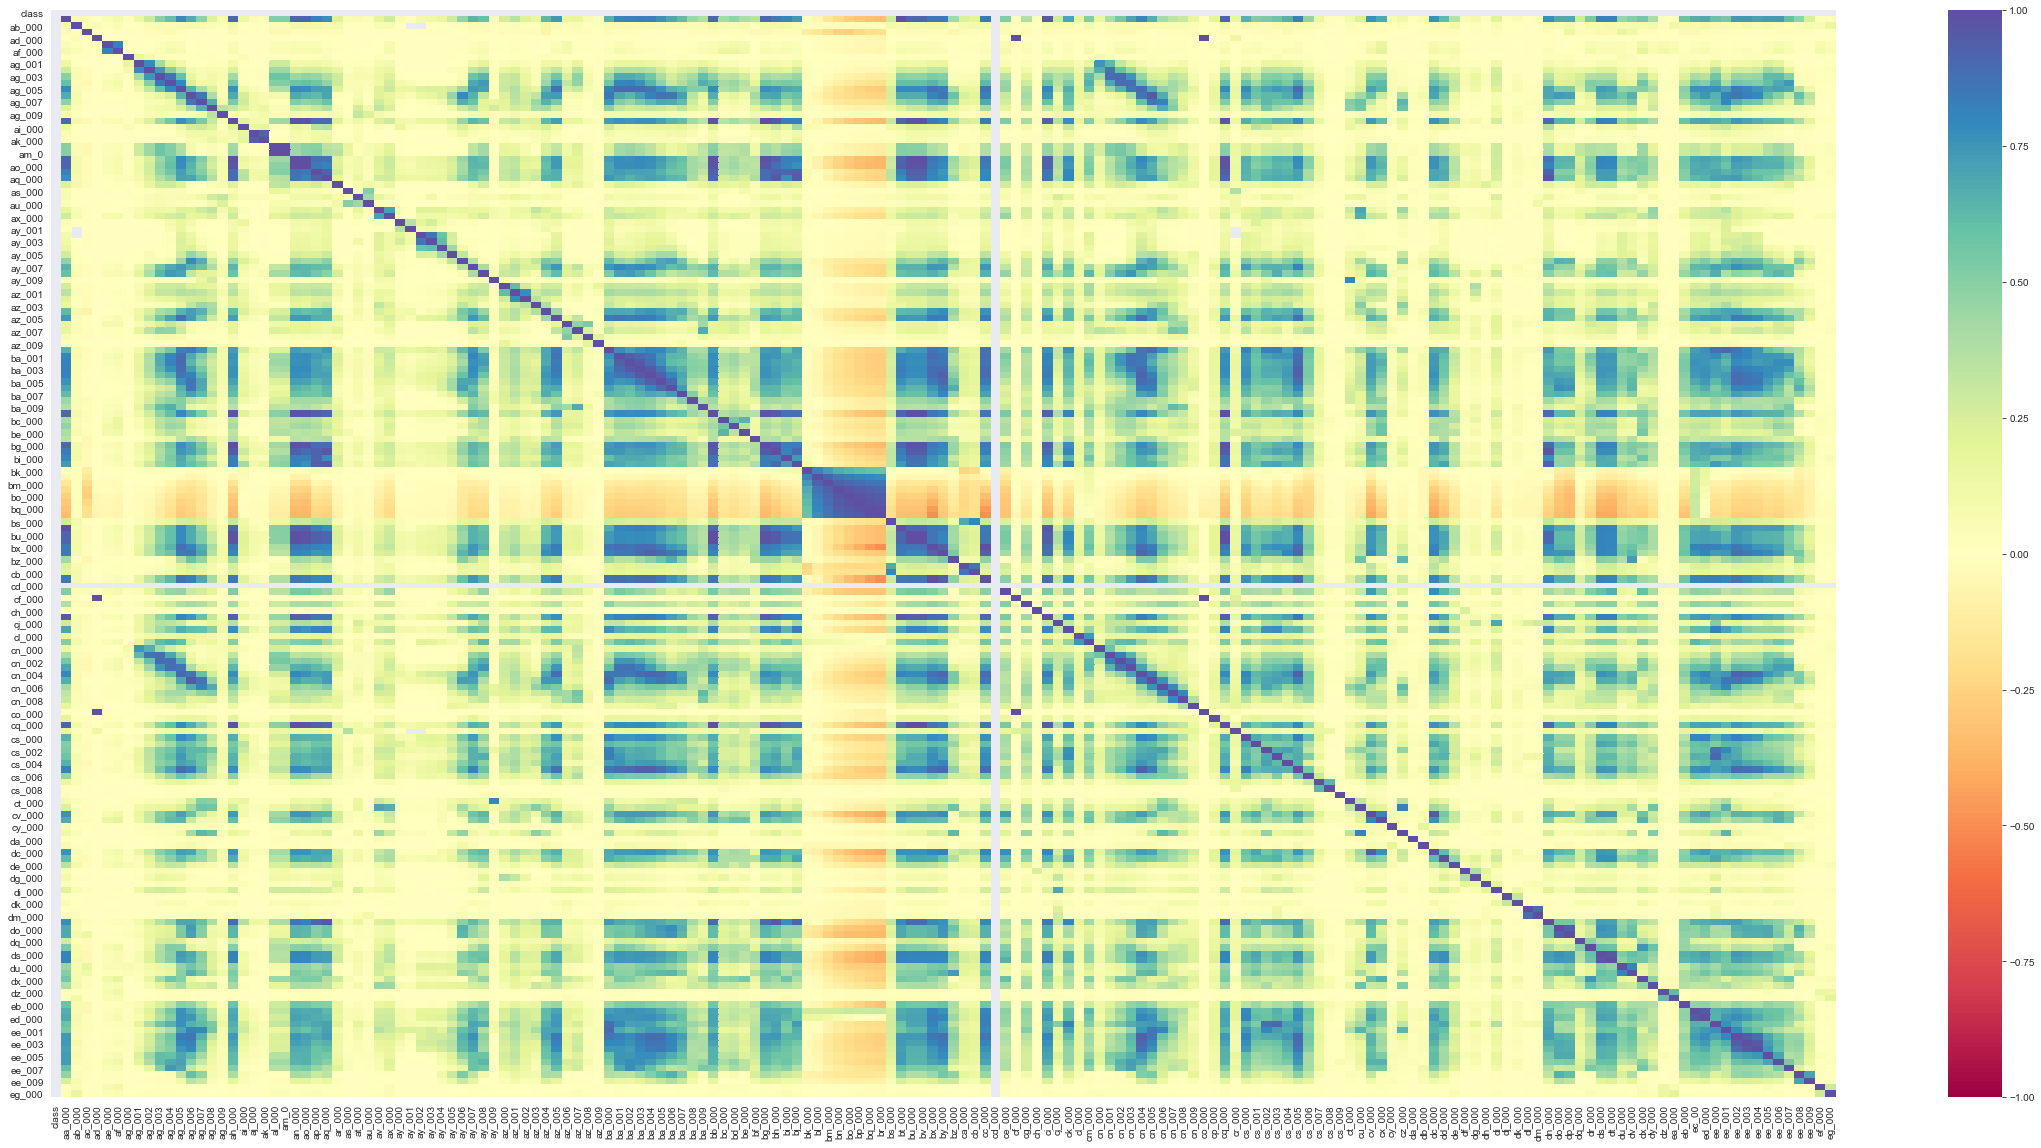

In [33]:
# first the correlation heatmap
train_ = train
train_['class'] = [1 if i=='pos' else 0 for i in train['class']]
correlations = train_.corr()
plt.figure(figsize=(40,20))
sns.heatmap(correlations, cmap='Spectral', vmin=-1, vmax=1)

- Almost all of the matrix has positive correlations as seen from the heatmap. This would mean that for the positive class, the feature values might mostly be larger compared to datapoints of the negative class. 
- There are some features among which there is a higher value of correlation among others. However, for most of the features, the correlation is between 0 and 0.25.
- For the class labels, the correlations are mostly below 0.25. However, some features do have a higher correlations with the class as seen by a few darker coloured sections in the row pertaining to class labels.

Now we are going to perform t-SNE on the dataset and plot it.

In [11]:
tsne = TSNE(n_components=2, perplexity=50, verbose=10, n_jobs=-1)
transformed_50 = tsne.fit_transform(train_eda)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.012s...
[t-SNE] Computed neighbors for 60000 samples in 106.821s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

C:\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


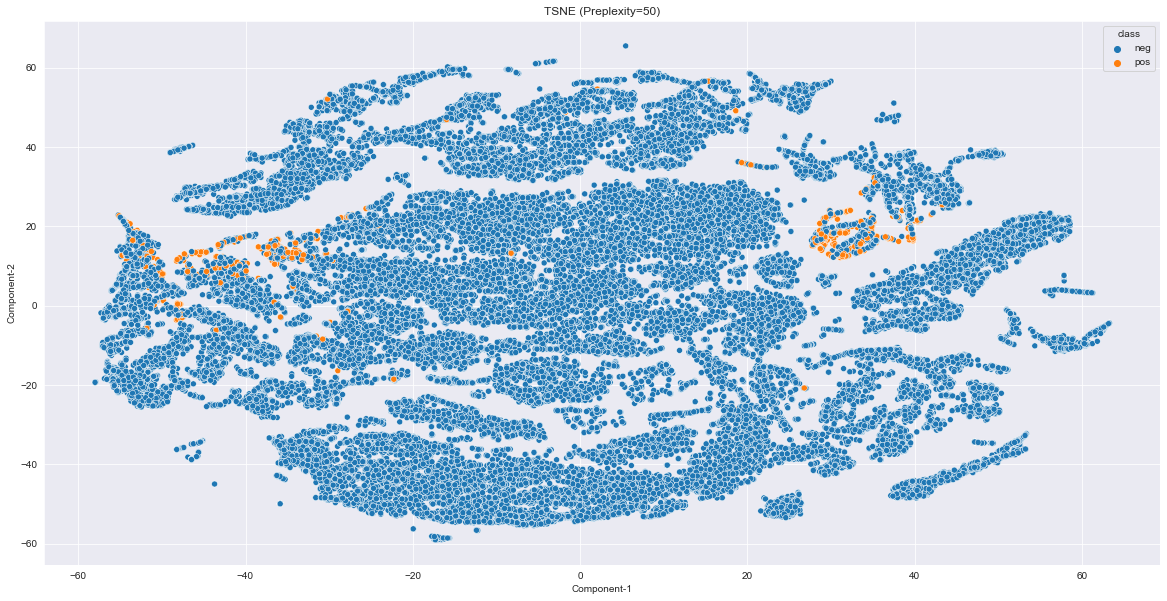

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(transformed_50[:,0], transformed_50[:,1], hue=Y)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('TSNE (Preplexity=50)')
plt.show()

In [13]:
# pelexity = 100
tsne = TSNE(n_components=2, perplexity=100, verbose=10, n_jobs=-1)
transformed_100 = tsne.fit_transform(train_eda)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.013s...
[t-SNE] Computed neighbors for 60000 samples in 108.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

C:\Anaconda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


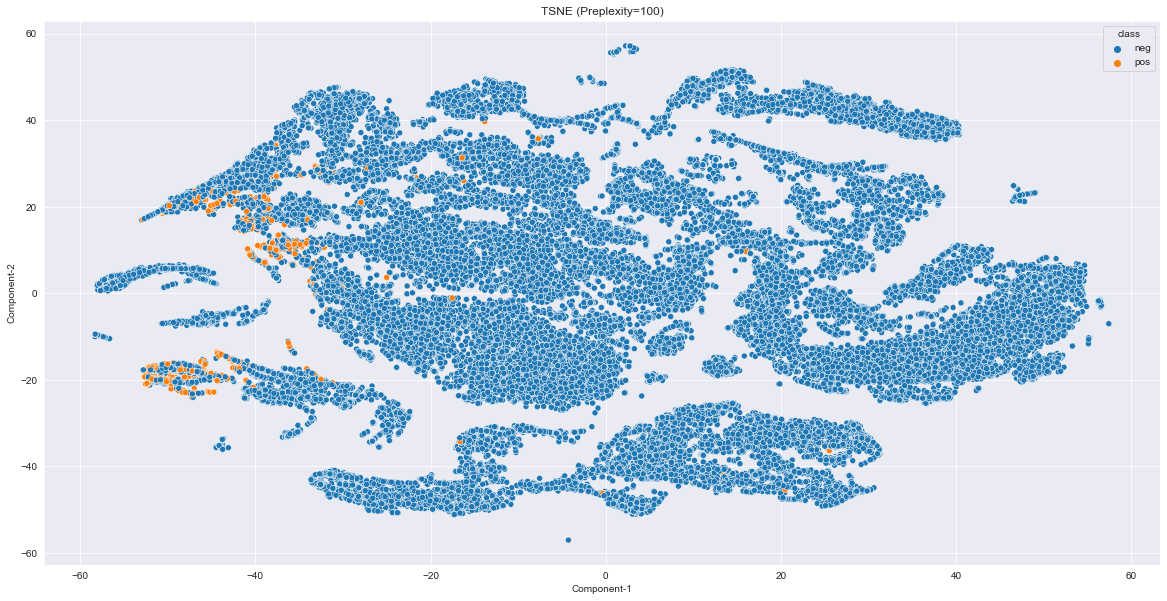

In [14]:
plt.figure(figsize=(20,10))
sns.scatterplot(transformed_100[:,0], transformed_100[:,1], hue=Y)
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('TSNE (Preplexity=100)')
plt.show()

- The general structure of the t-SNE plot for both the perplexities look similar to each other, hence this plot can be treated as the final plot.
- In this plot, we can see a similar thing hapenning as in the last two t-SNE plots of numerical and histogram features.
- Using all the features however, we can see that there are more number of points of the positive class are much more densely collected in a single location and the intersection between the clusters of both the classes(relatively).
- We can see this in the plot as on the left most cluster has quite a lot of positive class datapoints.
- Using all the features, there is still intersection between the datapoints of both the classes in 2 dimensions.

 <a id='strategy'></a>
## Imputation of missing values
Our strategy of missing value imputation is going to be as follows:
- For features with less than 5% missing values, we will be doing mean imputation.
- For features with missing values between 5 and 15%, we will use median imputation because of its robustness to outliers.<br>
The reason for using these techniques is that the more _advanced_ techniques are much more complicated and hence using them for imputation for such a small number of missing values (relatively) is just overkill. Even though constant value imputations have their own disadvantages but the number of datapoints is too low to affect the performance by a lot. This is just a trade-off that have need to make.
- For features with missing values between 15-70%, we will use model based imputation. For this, we are going to use two different techniques:-
>1. MICE
>2. KNN Based Imputation<br>

The reason for using model based imputation techniques is that there are just too many missing values here to impute and too less datapoints to calculate an accurate/precise enough mean and having many datapoints with the same value for a feature is not good since it doesnt add any new information to the dataset. Also, there are not a lot of features that fall under this category and hence it wont harm our _low-latency constraint_ as much.
- For features with >70% missing values, we will drop them entirely from the dataset. This is because we do not have enough data to learn a good enough model for imputation.

In [16]:
# before doing that, we need to save some values
# saving the lists below_5, between_5_15, between_15_70 and above_70 by combining into a list
if not os.path.isfile("Saves\\Impute\\strat_list.pickle"):
    print("The strategy list is not made, making it and saving...")
    feature_strat_list = [below_5, between_5_15, between_15_70, above_70]
    with open('Saves\\Impute\\strat_list.pickle', 'wb') as f:
        pickle.dump(feature_strat_list, f)
    print("Strategy list made and saved.")
else:
    print('List is already saved, loading it from the disk.')
    with open("Saves\\Impute\\strat_list.pickle", 'rb') as f:
        strategy_list = pickle.load(f)
    print(len(strategy_list))

List is already saved, loading it from the disk.
4


First, we are going to perform Imputations for the train data first and train and save all the imputer objects and then load those to impute the test data as well. <br>
First of all,  we are going to drop the features having more than 70% of missing values.

In [22]:
print('Features to drop:', strategy_list[3])

Features to drop: ['ab_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']


In [17]:
cat4 = strategy_list[3] # feature names for dropping
train_red = train.drop(columns=cat4)
print(train_red.shape)
train_red.head()

(60000, 164)


class  aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0   neg   76698  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0   
1   neg   33058  0.000000e+00     NaN     0.0     0.0     0.0     0.0     0.0   
2   neg   41040  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0   
3   neg      12  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0   
4   neg   60874  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0   

   ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006    ee_007  \
0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0  157956.0   
1     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   81140.0   
2     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0  158022.0   
3   318.0  ...      240.0      46.0      58.0      44.0      10.0       0.0   
4     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  
0   73224.0     0.0     0.0     0.0  
1   97576.0  1500.0     0.0     0.0  
2   95128.0   514.0     0.0     0.0  
3       0.0     0.0     4.0    32.0  
4  433954.0  1218.0     0.0     0.0  

[5 rows x 164 columns]

In [18]:
# checking for any duplicate values now
train_red[train_red.duplicated()]

Empty DataFrame
Columns: [class, aa_000, ac_000, ad_000, ae_000, af_000, ag_000, ag_001, ag_002, ag_003, ag_004, ag_005, ag_006, ag_007, ag_008, ag_009, ah_000, ai_000, aj_000, ak_000, al_000, am_0, an_000, ao_000, ap_000, aq_000, ar_000, as_000, at_000, au_000, av_000, ax_000, ay_000, ay_001, ay_002, ay_003, ay_004, ay_005, ay_006, ay_007, ay_008, ay_009, az_000, az_001, az_002, az_003, az_004, az_005, az_006, az_007, az_008, az_009, ba_000, ba_001, ba_002, ba_003, ba_004, ba_005, ba_006, ba_007, ba_008, ba_009, bb_000, bc_000, bd_000, be_000, bf_000, bg_000, bh_000, bi_000, bj_000, bk_000, bl_000, bm_000, bs_000, bt_000, bu_000, bv_000, bx_000, by_000, bz_000, ca_000, cb_000, cc_000, cd_000, ce_000, cf_000, cg_000, ch_000, ci_000, cj_000, ck_000, cl_000, cm_000, cn_000, cn_001, cn_002, cn_003, cn_004, cn_005, ...]
Index: []

[0 rows x 164 columns]

There are no duplicate values after removing those features.
Now, we will perform mean imputations for features with less than 5% missing values

In [19]:
cat1 = strategy_list[0]
# declaring the simple imputer object
mean_imputer = SimpleImputer(strategy='mean')
# fitting to train data for the required features
mean_imputer.fit(train[cat1])
# getting the imputed train values
mean_imp_train = mean_imputer.transform(train[cat1])

print(mean_imp_train.shape, type(mean_imp_train))

# saving the mean imputer on the disk
with open('Saves\\Impute\\Means\\mean_imputer.pickle', 'wb') as mi:
    pickle.dump(mean_imputer, mi)

(60000, 128) <class 'numpy.ndarray'>


Performing median imputations for features with missing values between 5-15%.

In [20]:
cat2 = strategy_list[1]
# declaring the simple imputer object
median_imputer = SimpleImputer(strategy='median')
# fititng to train data
median_imputer.fit(train[cat2])
# getting the imputed values for train set
median_imp_train = median_imputer.transform(train[cat2])

print(median_imp_train.shape, type(median_imp_train))

# saving the median imputer on the disk
with open('Saves\\Impute\\Medians\\median_imputer.pickle', 'wb') as mi:
    pickle.dump(median_imputer, mi)

(60000, 14) <class 'numpy.ndarray'>


In [21]:
# replacing the mean and median imputed features in the train set
train_red[cat1] = mean_imp_train
train_red[cat2] = median_imp_train

print(train_red.shape)
train_red.head()

(60000, 164)


class   aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg  76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1   neg  33058.0  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2   neg  41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3   neg     12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4   neg  60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3     0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 164 columns]

In [30]:
# dropping the class labels from the dataframe
train_red = train_red.drop(columns='class')

### 1. Using MICE algorithm for imputation
For performing MICE algorithm, we are going to use the SkLearn IterativeImputer class.<br>
Refer:
https://www.youtube.com/watch?v=1n7ld38PjEc<br>
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html<br>
https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html<br>

Referring to https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html, we can see that ridge_regressor and extra trees have similar performances. Thus, I have decided to use ridge regression instead of extratrees regression because its simpler compared to tree based ensembles and hence will train and make predictions much faster.

In [13]:
# declare the model
imputer_model = Ridge(normalize=True)
# declare the imputer
imputer = IterativeImputer(estimator=imputer_model, max_iter=50, verbose=2)
# fit the imputer 
imputer.fit(train_red)

[IterativeImputer] Completing matrix with shape (60000, 163)
[IterativeImputer] Ending imputation round 1/50, elapsed time 89.27
[IterativeImputer] Change: 6433976909.731048, scaled tolerance: 8584297.742 
[IterativeImputer] Ending imputation round 2/50, elapsed time 179.42
[IterativeImputer] Change: 2230939327.9305305, scaled tolerance: 8584297.742 
[IterativeImputer] Ending imputation round 3/50, elapsed time 268.65
[IterativeImputer] Change: 1407796796.0842586, scaled tolerance: 8584297.742 
[IterativeImputer] Ending imputation round 4/50, elapsed time 357.79
[IterativeImputer] Change: 1225001926.6506662, scaled tolerance: 8584297.742 
[IterativeImputer] Ending imputation round 5/50, elapsed time 447.87
[IterativeImputer] Change: 1068893134.6798143, scaled tolerance: 8584297.742 
[IterativeImputer] Ending imputation round 6/50, elapsed time 538.04
[IterativeImputer] Change: 934292476.8501184, scaled tolerance: 8584297.742 
[IterativeImputer] Ending imputation round 7/50, elapsed tim

IterativeImputer(estimator=BayesianRidge(), max_iter=50, verbose=2)

In [14]:
# saving the imputer on the disk
with open("Saves\\Impute\\MICE\\mice_BayesianRidge.pickle", 'wb') as f:
    pickle.dump(imputer, f)

In [27]:
# loading the imputer from the disk 
if os.path.isfile('Saves\\Impute\\MICE\\mice_BayesianRidge.pickle'):
    print("Imputer present, loading...")
    with open('Saves\\Impute\\MICE\\mice_BayesianRidge.pickle', 'rb') as f:
        mice_imputer = pickle.load(f)
    mice_imputer
else:
    print("Imputer not present in given location, please recheck the location or run the above cells to train and save the imputer.")

Imputer present, loading...


In [22]:
# imputing the missing values on train data and saving the dataframe on the disk
train_mice = pd.DataFrame(mice_imputer.transform(train_red), columns=train_red.columns)
# saving on the disk
train_mice.to_csv("Saves\\Datasets\\train_mice_br.csv")

[IterativeImputer] Completing matrix with shape (60000, 163)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.93
[IterativeImputer] Ending imputation round 2/50, elapsed time 1.84
[IterativeImputer] Ending imputation round 3/50, elapsed time 2.76
[IterativeImputer] Ending imputation round 4/50, elapsed time 3.68
[IterativeImputer] Ending imputation round 5/50, elapsed time 4.63
[IterativeImputer] Ending imputation round 6/50, elapsed time 5.55
[IterativeImputer] Ending imputation round 7/50, elapsed time 6.49
[IterativeImputer] Ending imputation round 8/50, elapsed time 7.44
[IterativeImputer] Ending imputation round 9/50, elapsed time 8.40
[IterativeImputer] Ending imputation round 10/50, elapsed time 9.32
[IterativeImputer] Ending imputation round 11/50, elapsed time 10.27
[IterativeImputer] Ending imputation round 12/50, elapsed time 11.21
[IterativeImputer] Ending imputation round 13/50, elapsed time 12.13
[IterativeImputer] Ending imputation round 14/50, elapsed tim

### 2. Using KNN based Imputer for imputation
refer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [31]:
# declare the imputer
imputer = KNNImputer()
# fit the imputer 
imputer.fit(train_red)

KNNImputer()

In [32]:
%%time
# imputing the train sets and saving on the disk
train_imp = pd.DataFrame(imputer.transform(train_red), columns=train_red.columns)
# saving the imputer on the disk
with open("Saves\\Impute\\MICE\\knn_imputer.pickle", 'wb') as f:
    pickle.dump(imputer, f)

Wall time: 13min 28s


In [34]:
# loading the KNNImputer from the disk
if os.path.isfile('Saves\\Impute\\MICE\\knn_imputer.pickle'):
    print('Imputer exists, loading it...')
    with open("Saves\\Impute\\MICE\\knn_imputer.pickle", 'rb') as f:
        imputer_knn = pickle.load(f)
    print(imputer_knn)
else:
    print('Imputer does not exist in the specified location, please check the location or run the above cells.')

Imputer exists, loading it...
KNNImputer()


In [36]:
%%time
# save the KNN imputed dataset
train_imp.to_csv('Saves\\Datasets\\train_knn.csv', index=False)

Wall time: 8.43 s


Imputing the values in the test set and saving those datasets on the disk based on the [strategy](#strategy)

In [57]:
def impute_data(data, strategy_list, imputers):
    '''
        This function imputes the data by making the use of strategy defined above and save the imputed datasets on the 
        disk. 
        Features:
            data: The dataset on which imputation is to be done
            strategy_list: list of lists of features for each imputation strategy.
                            The list order has to be as follows: mean imputed features, median imputed features, mice/knn
                            imputed features and features to be dropped.
            imputers: list of different imputers in the orders (mean, median, mice and knn imputers)
        Returns: The imputed datasets of the order (mice imputation, knn imputation).
    '''
    mean_imp, med_imp, mice_imp, knn_imp = imputers
    # dropping the features of category 4
    print('Dropping features of category 4...')
    cat4 = strategy_list[3]
    inter_ = data.drop(columns=cat4)
    inter_ = inter_.drop(columns='class')
    
    # performing mean imputation
    print('Performing mean imputation on category 1 features...')
    cat1 = strategy_list[0]
    mean_imputed = mean_imp.transform(inter_[cat1])
    # adding to the dataframe
    inter_[cat1] = mean_imputed
    
    # performing median imputation
    print("Performing median imputation on category 2 features...")
    cat2 = strategy_list[1]
    median_imputed = med_imp.transform(inter_[cat2])
    # adding to the dataframe
    inter_[cat2] = median_imputed
    
    # performing mice imputation
    print("Performing MICE based imputation on category 3 features...")
    cat3 = strategy_list[2]
    mice_imputed = pd.DataFrame(mice_imp.transform(inter_), columns=inter_.columns)
    
    # performing KNN imputation
    print('Performing KNN based imputation on category 3 features...')
    knn_imputed = pd.DataFrame(knn_imp.transform(inter_), columns=inter_.columns)
    
    # adding the class labels back
    mice_imputed['class'] = data['class']
    knn_imputed['class'] = data['class']
    
    # saving these dataframes on the disk
    print('Saving the imputed dataframes...')
    print('1. Saving MICE dataframe...')
    mice_imputed.to_csv('Saves\\Datasets\\test_mice.csv', index=False)
    print('2. Saving KNN dataframe...')
    knn_imputed.to_csv('Saves\\Datasets\\test_knn.csv', index=False)
    
    return (mice_imputed, knn_imputed)

In [58]:
# imputing the 
test_mice, test_knn = impute_data(test, strategy_list, [mean_imputer, median_imputer, mice_imputer, imputer_knn])

Dropping features of category 4...
Performing mean imputation on category 1 features...
Performing median imputation on category 2 features...
Performing MICE based imputation on category 3 features...
[IterativeImputer] Completing matrix with shape (16000, 163)
[IterativeImputer] Ending imputation round 1/50, elapsed time 0.22
[IterativeImputer] Ending imputation round 2/50, elapsed time 0.43
[IterativeImputer] Ending imputation round 3/50, elapsed time 0.66
[IterativeImputer] Ending imputation round 4/50, elapsed time 0.87
[IterativeImputer] Ending imputation round 5/50, elapsed time 1.09
[IterativeImputer] Ending imputation round 6/50, elapsed time 1.31
[IterativeImputer] Ending imputation round 7/50, elapsed time 1.52
[IterativeImputer] Ending imputation round 8/50, elapsed time 1.74
[IterativeImputer] Ending imputation round 9/50, elapsed time 1.95
[IterativeImputer] Ending imputation round 10/50, elapsed time 2.18
[IterativeImputer] Ending imputation round 11/50, elapsed time 2.4

In [72]:
print(test_mice.shape)
test_mice.head()

(16000, 164)


aa_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002    ag_003  \
0     60.0    20.0    12.0     0.0     0.0     0.0     0.0     0.0    2682.0   
1     82.0    68.0    40.0     0.0     0.0     0.0     0.0     0.0       0.0   
2  66002.0   212.0   112.0     0.0     0.0     0.0     0.0     0.0  199486.0   
3  59816.0  1010.0   936.0     0.0     0.0     0.0     0.0     0.0       0.0   
4   1814.0   156.0   140.0     0.0     0.0     0.0     0.0     0.0       0.0   

      ag_004  ...    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     4736.0  ...     138.0     412.0     654.0       78.0      88.0   
1      748.0  ...     276.0    1620.0     116.0       86.0     462.0   
2  1358536.0  ...  380368.0  440134.0  269556.0  1315022.0  153680.0   
3   123922.0  ...  243270.0  483302.0  485332.0   431376.0  210074.0   
4       72.0  ...    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  class  
0       0.0     0.0     0.0     0.0    neg  
1       0.0     0.0     0.0     0.0    neg  
2     516.0     0.0     0.0     0.0    neg  
3  281662.0  3232.0     0.0     0.0    neg  
4      76.0     0.0     0.0     0.0    neg  

[5 rows x 164 columns]

## Feature Engineering
We are going to perform feature engineering on the dataset now. We are going to construct different features based on the EDA we performed and by taking reference from this [paper](https://www.researchgate.net/publication/313067390_Combining_Boosted_Trees_with_Metafeature_Engineering_for_Predictive_Maintenance). Feature engineering based on domain knowledge is not possible since the feature names are anonymized. 
We are going to construct the following features:
1. From the EDA of missing values for a datapoint, we found out that the number of missing values for the positive class is generally higher from the negative class datapoints, as seen from the boxplots. Thus, having a feature that just counts the number of missing values for each datapoint could be good for prediction.<br>
As per the paper mentioned above, the positive class datapoints can be treated like outliers, or some sort of anomality points and hence the problem becomes one of outlier detection. As a result, the paper mentions two features that can be constructed based on the problem.
2. Calculating LOCAL OUTLER FACTOR (LOF) for all the datapoints.
3. Calculating the difference between a particular feature and a specific value from the boxplot of that feature. The values that I have choosen for this are the 25, 50 and 75th percentile values. However, since there are so many features in the dataset, doing this for all the features will increase the dimensionality of the datapoint which might hurt the performance due to the __curse of dimensionality__ and will also increase the prediction time of the model which might hurt the __low latency__ constraint. That is why, I am going to select 10 most important features from the dataset based on the feature importances from a random forest model. These features will be known as __BOXPLOT FEATURES__.
4. Training an AutoEncoder on the train data and taking the encoder part of the model to generate encodings for each datapoint and using these encodings as features.

In [4]:
# loading the imputed train set
train_mice = pd.read_csv("Saves\\Datasets\\train_mice_br.csv").iloc[:,1:]
print(train_mice.shape)
train_mice.head()

(60000, 163)


aa_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0  76698.0  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00  190155.834337     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4  60874.0  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003   ag_004  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0  37250.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0  18254.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0   1648.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0   318.0   2212.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0  43752.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 163 columns]

In [5]:
train_knn = pd.read_csv("Saves\\Datasets\\train_knn.csv")
print(train_knn.shape)
train_knn.head()

(60000, 163)


aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0  76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00   208.4     0.0     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0   
4  60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0   

   ag_003   ag_004  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0  37250.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0  18254.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0   1648.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3   318.0   2212.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0  43752.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 163 columns]

### 1. Number of missing values per datapoint
For this feature, we are going to calculate the number of missing values on the original train set.

In [6]:
# finding the number of missing values for each datpoint
nan_counts = train.isnull().sum(axis=1)

# adding this feature to the two train sets
train_mice['nan_counts'] = nan_counts
train_knn['nan_counts'] = nan_counts

# adding the class labels too
train_mice['class'] = train['class']
train_knn['class'] = train['class']

print(train_mice.shape, train_knn.shape)
train_mice.head()

(60000, 165) (60000, 165)


aa_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0  76698.0  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00  190155.834337     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4  60874.0  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003   ag_004  ...    ee_004    ee_005    ee_006    ee_007  \
0     0.0     0.0  37250.0  ...  721044.0  469792.0  339156.0  157956.0   
1     0.0     0.0  18254.0  ...  293306.0  245416.0  133654.0   81140.0   
2     0.0     0.0   1648.0  ...  423992.0  409564.0  320746.0  158022.0   
3     0.0   318.0   2212.0  ...      58.0      44.0      10.0       0.0   
4     0.0     0.0  43752.0  ...  405298.0  347188.0  286954.0  311560.0   

     ee_008  ee_009  ef_000  eg_000  nan_counts  class  
0   73224.0     0.0     0.0     0.0           5    neg  
1   97576.0  1500.0     0.0     0.0          21    neg  
2   95128.0   514.0     0.0     0.0           8    neg  
3       0.0     0.0     4.0    32.0           8    neg  
4  433954.0  1218.0     0.0     0.0           7    neg  

[5 rows x 165 columns]

### 2. Calculating LOF for each datapoint
Here, we are going to use the imputed mice and knn datasests to calculate the LOF values for the mice and knn datasets respectively.
Refer:
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

Local outlier factor is a technique that is used to detect outliers/anomalies in a dataset. It does this by comparing the density of the points around the concerned datapoint to the average density of points in its neighbourhood (the set of closest datapoints to the concerned point). The value of LOF ranges from 0 to +inf. If a datapoint has a LOF value of around 1 and the higher value suggests that the datapoint might be an outlier.

__NOTE:__ According to the documentation, the LocalOutlierFactor class has two different ways of working. These are, 1. outlier detection and 2. novelty detection. According to [this](https://scikit-learn.org/stable/modules/outlier_detection.html), outlier detection is a technique of detecting anomalies\outliers present in the dataset itself while novelty detection is outlier/anomaly detection on previously unseen data. And they have different ways of training/prediction. As a result, the featurization of the train set seems to be an outlier detection problem while the featurization of the test set seems to be a novelty detection problem.

In [39]:
def train_lof(data, name):
    '''
        Function to train a LocalOutlierFactor object on the train set, return the set with lof features and save the object
        on the disk.
        Parameters:
            data: the dataset
            name: name of the obejct to be saved.
    '''
    # making a copy of the dataset
    data_copy = data.copy()
    # declaring the object
    lof_object = LocalOutlierFactor(n_neighbors=20, novelty=True, n_jobs=-1)
    # fitting on the train data
    lof_object.fit(data.drop(columns=['class', 'nan_counts'])) # we are going to use the original dataset hence removing the
                                                               # class labels and the constructed feature 'nan_counts'
    # getting the local outlier factor of the train set
    lofs = lof_object.negative_outlier_factor_
    # adding the lof to the dataframe
    data_copy['lof'] = lofs
    # saving the object to disk
    with open("Saves\\Feature Engineering\\LOF\\"+name+'.pickle', 'wb') as f:
        pickle.dump(lof_object, f)
    return data_copy

In [40]:
# making lof features for mice dataset
mice_lof_data = train_lof(train_mice, 'lof_mice')
mice_lof_data.head()

aa_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0  76698.0  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00  190155.834337     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4  60874.0  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003   ag_004  ...    ee_005    ee_006    ee_007    ee_008  \
0     0.0     0.0  37250.0  ...  469792.0  339156.0  157956.0   73224.0   
1     0.0     0.0  18254.0  ...  245416.0  133654.0   81140.0   97576.0   
2     0.0     0.0   1648.0  ...  409564.0  320746.0  158022.0   95128.0   
3     0.0   318.0   2212.0  ...      44.0      10.0       0.0       0.0   
4     0.0     0.0  43752.0  ...  347188.0  286954.0  311560.0  433954.0   

   ee_009  ef_000  eg_000  nan_counts  class       lof  
0     0.0     0.0     0.0           5    neg -1.061689  
1  1500.0     0.0     0.0          21    neg -1.146823  
2   514.0     0.0     0.0           8    neg -1.038356  
3     0.0     4.0    32.0           8    neg -1.105870  
4  1218.0     0.0     0.0           7    neg -1.126652  

[5 rows x 166 columns]

In [41]:
# making lof features for knn dataset
knn_lof_data = train_lof(train_knn, 'lof_knn')
knn_lof_data.head()

aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0  76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00   208.4     0.0     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0   
4  60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0   

   ag_003   ag_004  ...    ee_005    ee_006    ee_007    ee_008  ee_009  \
0     0.0  37250.0  ...  469792.0  339156.0  157956.0   73224.0     0.0   
1     0.0  18254.0  ...  245416.0  133654.0   81140.0   97576.0  1500.0   
2     0.0   1648.0  ...  409564.0  320746.0  158022.0   95128.0   514.0   
3   318.0   2212.0  ...      44.0      10.0       0.0       0.0     0.0   
4     0.0  43752.0  ...  347188.0  286954.0  311560.0  433954.0  1218.0   

   ef_000  eg_000  nan_counts  class       lof  
0     0.0     0.0           5    neg -1.061866  
1     0.0     0.0          21    neg -1.148242  
2     0.0     0.0           8    neg -1.042936  
3     4.0    32.0           8    neg -1.096300  
4     0.0     0.0           7    neg -1.127503  

[5 rows x 166 columns]

### 3. Calculating the Boxplot Features
For each feature, this will result in 3 more features which are the difference between the feature value and the 25th, 50th and the 75th percentile. However, instead of using all the features, I will be using the top 10 most important features. The feature selection will be done using a random forest model.

In [13]:
# selecting important features
rfs = RandomForestClassifier(verbose=10, n_jobs=-1, random_state=42)
rfs.fit(train_knn.drop(columns='class'), train_knn['class'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s



building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.0s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.8s


building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    4.9s


building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.9s


building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    6.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=10)

In [14]:
# getting feature importances
importances = rfs.feature_importances_
ind_ = np.argsort(importances)[::-1] # getting indices of most important features
imp_features = knn_lof_data.columns[ind_][:10]
print('The important features are:', imp_features)

The important features are: Index(['ag_002', 'ck_000', 'bb_000', 'ci_000', 'bj_000', 'am_0', 'al_000',
       'aq_000', 'ap_000', 'cn_000'],
      dtype='object')


In [112]:
# calculating the quantiles for the given features for both the columns
# first for the mice features
quantile_val_mice = {}
for ft in imp_features:
    values = train_mice[ft]
    quants = np.percentile(train_mice[ft], [25, 50, 75])
    quantile_val_mice[ft] = quants
print(quantile_val_mice)
# saving the dictionary
with open('Saves\\Feature Engineering\\Quantiles\\quantiles_mice.pickle', 'wb') as f:
    pickle.dump(quantile_val_mice, f)

{'ag_002': array([0., 0., 0.]), 'ck_000': array([ 14756.16, 253183.2 , 558350.16]), 'bb_000': array([ 107570.5, 2388194. , 3962532. ]), 'ci_000': array([  49018.32, 1872824.64, 2989382.4 ]), 'bj_000': array([  8698. , 156910. , 342726.5]), 'am_0': array([   0. ,    0. , 2602.5]), 'al_000': array([   0. ,    0. , 1350.5]), 'aq_000': array([  4254., 182664., 386918.]), 'ap_000': array([ 25804.5, 364822. , 744438. ]), 'cn_000': array([0., 0., 0.])}


In [118]:
# for the knn imputed dataset
quantile_val_knn = {}
for ft in imp_features:
    values = train_knn[ft]
    quants = np.percentile(train_knn[ft], [25, 50, 75])
    quantile_val_knn[ft] = quants
print(quantile_val_knn)
# saving the dictionary
with open('Saves\\Feature Engineering\\Quantiles\\quantiles_knn.pickle', 'wb') as f:
    pickle.dump(quantile_val_knn, f)

{'ag_002': array([0., 0., 0.]), 'ck_000': array([ 14756.16, 253183.2 , 558350.16]), 'bb_000': array([ 107570.5, 2388194. , 3962532. ]), 'ci_000': array([  49018.32, 1872824.64, 2989382.4 ]), 'bj_000': array([  8698. , 156910. , 342726.5]), 'am_0': array([   0. ,    0. , 2602.5]), 'al_000': array([   0. ,    0. , 1350.5]), 'aq_000': array([  4254., 182664., 386918.]), 'ap_000': array([ 25804.5, 364822. , 744438. ]), 'cn_000': array([0., 0., 0.])}


In [46]:
def boxplot_features(data, quantile_dict, savename):
    '''
        This function calculates the boxplot features for the given dataset for the given features.
        Parameters:
            data = the dataframe
            quantile_dict = a dictionary containing the quantile values for the selected features. The values of the 
            dictionary should be an array or a similar data structure of the form [25%, 50%, 75%] in the same order.
            savename: the name with which the feature needs to be saved on the disk
    '''
    # make a copy of the dataframe
    data_copy = data.copy()
    for ft, quants in tqdm(quantile_dict.items()):
        # getting the feature from the dataset
        feat_vals = data_copy[ft].values
        # calculating the boxplot features for 25, 50 and 75 %iles
        boxplot_25 = feat_vals - quants[0]
        boxplot_50 = feat_vals - quants[1]
        boxplot_75 = feat_vals - quants[2]
        # adding the features to the dataframe
        data_copy[ft+'_25']= boxplot_25
        data_copy[ft+'_50']= boxplot_50
        data_copy[ft+'_75']= boxplot_75
    
    # saving the dataframe on the disk
    data_copy.to_csv('Saves\\Datasets\\'+savename+'.csv', index=False)
    return data_copy

In [47]:
# getting the mice train features
train_all_mice = boxplot_features(mice_lof_data, quantile_val_mice, 'train_mice_all')

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 768.78it/s]


In [48]:
print(train_all_mice.shape)
train_all_mice.head()

(60000, 196)


aa_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0  76698.0  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00  190155.834337     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4  60874.0  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003   ag_004  ...  al_000_75  aq_000_25  aq_000_50  aq_000_75  \
0     0.0     0.0  37250.0  ...    -1350.5  1127786.0   949376.0   745122.0   
1     0.0     0.0  18254.0  ...    -1350.5   334290.0   155880.0   -48374.0   
2     0.0     0.0   1648.0  ...    -1350.5   149444.0   -28966.0  -233220.0   
3     0.0   318.0   2212.0  ...     -708.5    -3240.0  -181650.0  -385904.0   
4     0.0     0.0  43752.0  ...    -1350.5   546768.0   368358.0   164104.0   

   ap_000_25  ap_000_50  ap_000_75  cn_000_25  cn_000_50  cn_000_75  
0  1740203.5  1401186.0  1021570.0        0.0        0.0        0.0  
1  1058793.5   719776.0   340160.0        0.0        0.0        0.0  
2   274991.5   -64026.0  -443642.0        0.0        0.0        0.0  
3   -15040.5  -354058.0  -733674.0        0.0        0.0        0.0  
4  1032331.5   693314.0   313698.0        0.0        0.0        0.0  

[5 rows x 196 columns]

In [50]:
# getting the knn train features
train_all_knn = boxplot_features(knn_lof_data, quantile_val_mice, 'train_knn_all')

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 666.33it/s]


Making all the features for the test set.

In [26]:
def test_features(data, impute_type='mice'):
    '''
        This function constructs the features for the test set by loading all the required files from the disk and 
        then saves the newly constructed data_ftset into the disk.
    '''
    # making a copy of the data_ft where features will be added
    data_ft = data.copy()
    # loading the required files
    print('Loading the files')
    if impute_type == 'mice':
        # quantiles
        with open('Saves\\Feature Engineering\\Quantiles\\quantiles_mice.pickle', 'rb') as q:
            quantiles_dict = pickle.load(q)
        # LOF object
        with open('Saves\\Feature Engineering\\LOF\\lof_mice.pickle', 'rb') as l:
            lof_object = pickle.load(l)
    elif impute_type == 'knn':
        # quantiles
        with open('Saves\\Feature Engineering\\Quantiles\\quantiles_knn.pickle', 'rb') as q:
            quantiles_dict = pickle.load(q)
        # LOF object
        with open('Saves\\Feature Engineering\\LOF\\lof_knn.pickle', 'rb') as l:
            lof_object = pickle.load(l)
    else:
        raise ValueError('Invalid impute type.')
    # making the features
    print('-'*100)
    print('---CONSTRUCTING FEATURES---')
    # 1. nan counts
    print('1. Calculating nan counts...')
    nan_counts = data.isnull().sum(axis=1)
    data_ft['nan_counts'] = nan_counts
    
    # 2. LOF
    print('2. Calculating the LOF...')
    lof_scores = lof_object.score_samples(data.drop(columns='class'))
    data_ft['lof'] = lof_scores
    
    # 3. boxplot features
    print('3. Calculating Boxplot Features...')
    for ft, quants in tqdm(quantiles_dict.items()):
        # getting the feature from the data_ftset
        feat_vals = data_ft[ft].values
        # calculating the boxplot features for 25, 50 and 75 %iles
        boxplot_25 = feat_vals - quants[0]
        boxplot_50 = feat_vals - quants[1]
        boxplot_75 = feat_vals - quants[2]
        # adding the features to the data_ftframe
        data_ft[ft+'_25']= boxplot_25
        data_ft[ft+'_50']= boxplot_50
        data_ft[ft+'_75']= boxplot_75
        
    # saving the data_ftset on the disk
    print('Saving the data_ftset to the disk')
    if impute_type == 'mice':
        filename = 'test_mice_all.csv'
    else:
        filename = 'test_knn_all.csv'
    
    data_ft.to_csv('Saves\\datasets\\'+filename, index=False)
    
    return data_ft

In [19]:
# making features for test - mice data
test_mice = pd.read_csv('Saves\\Datasets\\test_mice.csv')
print(test_mice.shape)

(16000, 164)


In [27]:
# making features and saving
test_mice_all = test_features(test_mice, impute_type='mice')

Loading the files
----------------------------------------------------------------------------------------------------
---CONSTRUCTING FEATURES---
1. Calculating nan counts...
2. Calculating the LOF...


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1110.72it/s]

3. Calculating Boxplot Features...
Saving the data_ftset to the disk


In [28]:
# making features for test - knn data
test_knn = pd.read_csv('Saves\\Datasets\\test_knn.csv')
print(test_knn.shape)

(16000, 164)


In [29]:
# making the features and saving
test_knn_all = test_features(test_knn, impute_type='knn')

Loading the files
----------------------------------------------------------------------------------------------------
---CONSTRUCTING FEATURES---
1. Calculating nan counts...
2. Calculating the LOF...


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1108.87it/s]

3. Calculating Boxplot Features...
Saving the data_ftset to the disk


### 4. Using Autoencoder to make features.
Refer: 
1. https://machinelearningmastery.com/autoencoder-for-classification/
2. appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3385/auto-encoders/8/module-8-neural-networks-computer-vision-and-deep-learning
3. https://www.youtube.com/watch?v=3jmcHZq3A5s&ab_channel=WelcomeAIOverlords

Autoencoders can be used for feature performing feature extraction. Once trained, the embeddings generated by the encoder can be used as important features. These features contain the collective information of the dataset in reduced number of dimensions and can also handle non linear datasets fairly well. Here, we are going to train the dataset on the test dataset and then the encoder will be used to make features. For this, we will be using the original dataset without any constructed features.<br>
We will be training two different auto-encoders, one for both the mice and knn imputation dataset.

In [5]:
# loading the imputed datasets again
# mice imputed data
data_mice = pd.read_csv('Saves\\Datasets\\train_mice_br.csv').iloc[:,1:]
# class labels
Y = train['class']
print(data_mice.shape)
data_mice.head()

(60000, 163)


aa_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  \
0  76698.0  2.130706e+09     280.000000     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00  190155.834337     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02     100.000000     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01      66.000000     0.0    10.0     0.0     0.0   
4  60874.0  1.368000e+03     458.000000     0.0     0.0     0.0     0.0   

   ag_002  ag_003   ag_004  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0  37250.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0  18254.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0   1648.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0   318.0   2212.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0  43752.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 163 columns]

In [6]:
# knn_imputed data
data_knn = pd.read_csv('Saves\\Datasets\\train_knn.csv')
print(data_knn.shape)
data_knn.head()

(60000, 163)


aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0  76698.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0   
1  33058.0  0.000000e+00   208.4     0.0     0.0     0.0     0.0     0.0   
2  41040.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0   
3     12.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0   
4  60874.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0   

   ag_003   ag_004  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0     0.0  37250.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1     0.0  18254.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2     0.0   1648.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3   318.0   2212.0  ...      240.0      46.0      58.0      44.0      10.0   
4     0.0  43752.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0  157956.0   73224.0     0.0     0.0     0.0  
1   81140.0   97576.0  1500.0     0.0     0.0  
2  158022.0   95128.0   514.0     0.0     0.0  
3       0.0       0.0     0.0     4.0    32.0  
4  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 163 columns]

Before training the auto-encoder, we need to first split the dataset into a train and a validation set in a 72-25% ratio. After that, we will need to perform feature scaling. For this, we are going to perform normalization.

In [7]:
# perform train-cross validation split
# mice split 
mice_train, mice_cv, y_train, y_cv = train_test_split(data_mice, Y, test_size=0.25, stratify=Y, random_state=42)
print(mice_train.shape, mice_cv.shape)

# knn split
knn_train, knn_cv, y_train, y_cv = train_test_split(data_knn, Y, test_size=0.25, stratify=Y, random_state=42)
print(knn_train.shape, knn_cv.shape)
print(y_train.shape, y_cv.shape)

(45000, 163) (15000, 163)
(45000, 163) (15000, 163)
(45000,) (15000,)


In [8]:
# normalizing the mice set
norm_mice = MinMaxScaler()
# fitting
norm_mice.fit(mice_train.values)

mice_tr_norm = norm_mice.transform(mice_train.values)
mice_cv_norm = norm_mice.transform(mice_cv.values)

print(mice_tr_norm.shape, mice_cv_norm.shape)
print(mice_tr_norm[0])
print(mice_cv_norm[0])

(45000, 163) (15000, 163)
[1.33053517e-02 7.13378348e-08 6.98880950e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.95869747e-06 6.60680957e-04 5.75786396e-03 9.87295708e-03
 1.25824916e-03 1.99971507e-05 0.00000000e+00 1.03814659e-02
 0.00000000e+00 1.52771018e-05 0.00000000e+00 1.16504593e-04
 1.93941318e-04 1.39274777e-02 1.47139868e-02 4.99660332e-03
 5.21487486e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.13478389e-04 6.85869176e-03 1.73581768e-03 4.29022444e-03
 0.00000000e+00 3.01640950e-04 1.35091644e-04 5.00785572e-05
 4.41819346e-05 8.70609667e-04 4.24484555e-03 1.43082877e-03
 1.02149694e-07 0.00000000e+00 0.00000000e+00 3.32454289e-03
 3.91583375e-03 4.29140314e-03 4.93785535e-03 6.04653145e-03
 7.97848304e-03 9.86605719e-03 3.32581487e-03 1.91901845e-07
 0.00000000e+00 1.22129272e-02 2.31766057e-04 5.48209834e-0

In [9]:
# normalizing the knn set
norm_knn = MinMaxScaler()
# fitting
norm_knn.fit(knn_train.values)

knn_tr_norm = norm_knn.transform(knn_train.values)
knn_cv_norm = norm_knn.transform(knn_cv.values)

print(knn_tr_norm.shape, knn_cv_norm.shape)
print(knn_tr_norm[0])
print(knn_cv_norm[0])

(45000, 163) (15000, 163)
[1.33053517e-02 7.13378348e-08 1.90580528e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.95869747e-06 6.60680957e-04 5.75786396e-03 9.87295708e-03
 1.25824916e-03 1.99971507e-05 0.00000000e+00 1.03814659e-02
 0.00000000e+00 1.52771018e-05 0.00000000e+00 1.16504593e-04
 1.93941318e-04 1.39274777e-02 1.47139868e-02 4.99660332e-03
 5.21487486e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.13478389e-04 6.85869176e-03 1.73581768e-03 4.29022444e-03
 0.00000000e+00 3.01640950e-04 1.35091644e-04 5.00785572e-05
 4.41819346e-05 8.70609667e-04 4.24484555e-03 1.43082877e-03
 1.02149694e-07 0.00000000e+00 0.00000000e+00 3.32454289e-03
 3.91583375e-03 4.29140314e-03 4.93785535e-03 6.04653145e-03
 7.97848304e-03 9.86605719e-03 3.32581487e-03 1.91901845e-07
 0.00000000e+00 1.22129272e-02 2.31766057e-04 5.48209834e-0

In [36]:
# normalizing the complete datasets themseleves for using in the future
mice_norm = norm_mice.transform(data_mice)
knn_norm = norm_knn.transform(data_knn)

__Making the AutoEncoder__

For the autoencoder, we are going to follow the below architecture:
<img src='https://i.imgur.com/rHjuOnH.png'>

In [4]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

Training the Autoencoder on MICE Imputed dataset.

In [25]:
# https://machinelearningmastery.com/autoencoder-for-classification/
# ENCODER
# level 1
input_ = Input(shape=(mice_tr_norm.shape[1],))
enc1 = Dense(units=200)(input_)
bn1 = BatchNormalization()(enc1)
act1 = LeakyReLU()(bn1)

# level 2
enc2 = Dense(100)(act1)
bn2 = BatchNormalization()(enc2)
act2 = LeakyReLU()(bn2)

# bottleneck layer
bottleneck = Dense(units=40)(act2)


# DECODER
# level 1
dec1 = Dense(100)(bottleneck)
bn3 = BatchNormalization()(dec1)
act3 = LeakyReLU()(bn3)

# level 2
dec2 = Dense(200)(act3)
bn4 = BatchNormalization()(dec2)
act3 = LeakyReLU()(bn4)


# OUTPUT
output_ = Dense(mice_train.shape[1], activation='linear')(act3)


# defining the model
autoencoder_mice = Model(inputs=input_, outputs=output_)

In [27]:
autoencoder_mice.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 163)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               32800     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0     

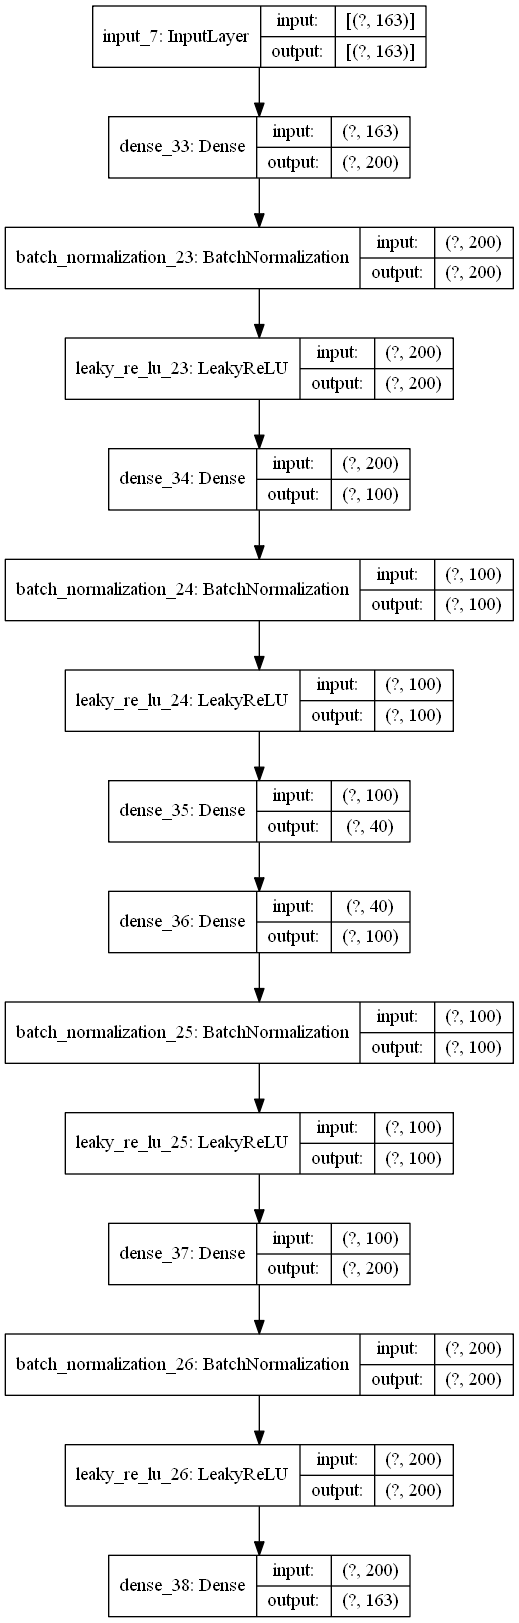

In [55]:
# plotting the model
plot_model(autoencoder_mice, show_shapes=True, show_layer_names=True)

In [29]:
# callbacks
# earlycheckpoint
earlystopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min')

# modelcheckpoint
savefile = 'Saves\\Feature Engineering\\AutoEncoders\\Mice\\weights.{epoch:02d}-{val_loss:.2f}'
modelcheckpoint = ModelCheckpoint(savefile, monitor='val_loss', verbose=1, mode='min')

In [30]:
# compiling the model
autoencoder_mice.compile(optimizer='adam', loss='mse')

In [31]:
# fitting the model
autoencoder_mice.fit(x=mice_tr_norm, y=mice_tr_norm,
                     batch_size=128, epochs=10,
                     validation_data=(mice_cv_norm, mice_cv_norm),
                     callbacks=[earlystopping, modelcheckpoint],
                    verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
43648/45000 [============================>.] - ETA: 0s - loss: 0.0129
Epoch 00001: saving model to Saves\Feature Engineering\AutoEncoders\Mice\weights.01-0.00
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Saves\Feature Engineering\AutoEncoders\Mice\weights.01-0.00\assets
45000/45000 [==============================] - 6s 134us/sample - loss: 0.0126 - val_loss: 0.0036
Epoch 2/10
44160/45000 [============================>.] - ETA: 0s - loss: 8.7709e-04
Epoch 00002: saving model to Saves\Feature Engineering\AutoEncoders\Mice\weights.02-0.00
INFO:tensorflow:Assets written to: Saves\Feature Engineering\AutoEncoders\Mice\weights.02-0.00\assets
45000/45000 [==============================] - 4s 97us/sample - loss: 8.7297e-04 - val_loss: 6.8630e-04
Epoch 3/10
44160/45000 [============================>.] - ETA: 0s - loss: 6.3815e-04
Epoch 00003: saving model to Saves\

In [32]:
# getting the encoder part
encoder_mice = Model(inputs=input_, outputs=bottleneck)

In [33]:
encoder_mice.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 163)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               32800     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0   

In [44]:
# saving the weights to disk
encoder_mice.save_weights(filepath='Saves\\Feature Engineering\\AutoEncoders\\Mice\\encoder_mice')

Training the Autoencoder on Knn imputed dataset.
> We are going to use the same architecture for the knn imputed dataset as well.

In [10]:
# https://machinelearningmastery.com/autoencoder-for-classification/
# ENCODER
# level 1
input_ = Input(shape=(knn_tr_norm.shape[1],))
enc1 = Dense(units=200)(input_)
bn1 = BatchNormalization()(enc1)
act1 = LeakyReLU()(bn1)

# level 2
enc2 = Dense(100)(act1)
bn2 = BatchNormalization()(enc2)
act2 = LeakyReLU()(bn2)

# bottleneck layer
bottleneck = Dense(units=40)(act2)


# DECODER
# level 1
dec1 = Dense(100)(bottleneck)
bn3 = BatchNormalization()(dec1)
act3 = LeakyReLU()(bn3)

# level 2
dec2 = Dense(200)(act3)
bn4 = BatchNormalization()(dec2)
act3 = LeakyReLU()(bn4)


# OUTPUT
output_ = Dense(knn_train.shape[1], activation='linear')(act3)


# defining the model
autoencoder_knn = Model(inputs=input_, outputs=output_)

In [11]:
autoencoder_knn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 163)]             0         
_________________________________________________________________
dense (Dense)                (None, 200)               32800     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0     

In [13]:
# compiling the model
autoencoder_knn.compile(optimizer='adam', loss='mse')

In [14]:
# fitting the model
autoencoder_knn.fit(x=knn_tr_norm, y=knn_tr_norm,
                     batch_size=128, epochs=10,
                     validation_data=(knn_cv_norm, knn_cv_norm),
                    verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0121 - val_loss: 0.0034
Epoch 2/10
45000/45000 [==============================] - 2s 39us/sample - loss: 8.6092e-04 - val_loss: 6.7355e-04
Epoch 3/10
45000/45000 [==============================] - 2s 37us/sample - loss: 6.5151e-04 - val_loss: 4.9481e-04
Epoch 4/10
45000/45000 [==============================] - 2s 37us/sample - loss: 5.2741e-04 - val_loss: 4.0618e-04
Epoch 5/10
45000/45000 [==============================] - 2s 37us/sample - loss: 4.8885e-04 - val_loss: 3.7811e-04
Epoch 6/10
45000/45000 [==============================] - 2s 36us/sample - loss: 4.1012e-04 - val_loss: 3.4553e-04
Epoch 7/10
45000/45000 [==============================] - 2s 37us/sample - loss: 3.9062e-04 - val_loss: 3.2944e-04
Epoch 8/10
45000/45000 [==============================] - 2s 36us/sample - loss: 3.5042e-04 - val_loss: 3.2434e-04
Epoch 9/10
45000/45000 [==============

In [15]:
# getting the encoder part of the model
encoder_knn = Model(inputs=input_, outputs=bottleneck)

In [16]:
# saving the model weights on the disk
encoder_knn.save_weights('Saves\\Feature Engineering\\AutoEncoders\\KNN\\encoder_knn')

__Now that the models have been trained, it is time to make encoded features.__

In [24]:
# loading the tests datasets
test_mice = pd.read_csv("Saves\\Datasets\\test_knn.csv")
test_knn = pd.read_csv("Saves\\Datasets\\test_mice.csv")

test_mice = test_mice.drop(columns='class')
test_knn = test_knn.drop(columns='class')

In [27]:
# normalizing both the datasets
test_mice_norm = norm_mice.transform(test_mice.values)
test_knn_norm = norm_knn.transform(test_knn.values)

First, we will construct features for mice dataset.

In [38]:
# first the train set
encodings_mice_train = encoder_mice.predict(mice_norm, verbose=1)

60000/60000 [==============================] - 2s 31us/sample


In [41]:
# test set
encodings_mice_test = encoder_mice.predict(test_mice_norm, verbose=1)

16000/16000 [==============================] - 1s 32us/sample


Now, we are going to make features for the knn imputed dataset.

In [45]:
# first the train set
encodings_knn_train = encoder_knn.predict(knn_norm, verbose=1)

60000/60000 [==============================] - 2s 31us/sample


In [46]:
# test set
encodings_knn_test = encoder_knn.predict(test_knn_norm, verbose=1)

16000/16000 [==============================] - 1s 33us/sample


We have constructed the features, we are going to save these numpy arrays themselves on the disk rather than making a completely new dataset since this is an experimental feature and hence instead of making a completely new dataset, its better to just save the vectors themselves and just append them to the dataframe.

In [47]:
# saving the arrays to the disk
def save_encodings(encoding, filename):
    '''
        This function saves the encodings to the disk.
    '''
    savepath = 'Saves\\Datasets\\Feature Encodings\\'+filename+'.pickle'
    with open(savepath, 'wb') as f:
        pickle.dump(encoding, f)
    print("File saved at:", savepath)
    
save_encodings(encodings_mice_train, 'encodings_mice_train')
save_encodings(encodings_mice_test, 'encodings_mice_test')
save_encodings(encodings_knn_train, 'encodings_knn_train')
save_encodings(encodings_knn_test, 'encodings_knn_test')

File saved at: Saves\Datasets\Feature Encodings\encodings_mice_train.pickle
File saved at: Saves\Datasets\Feature Encodings\encodings_mice_test.pickle
File saved at: Saves\Datasets\Feature Encodings\encodings_knn_train.pickle
File saved at: Saves\Datasets\Feature Encodings\encodings_knn_test.pickle


## Data Preprocessing

Since the dataset contains only numerical features, all we have to do to perform data preprocessing is to perform feature scaling on our features. We are going to normalize the features.

In [4]:
def normalize_train(data, savename):
    '''
        This function is used to normalize the train data and saving the minimum and maximum values of each feature on the
        disk.
    '''
    normalized = np.zeros(shape=(data.shape[0], data.shape[1]))
    norm_limits = [] # this list will store the minimum and maximum values of every feature
    for ind, feature in tqdm(enumerate(data.columns)):
        # getting the maximum and minimum values
        max_ = max(data[feature])
        min_ = min(data[feature])
        # appending the values to norm_limits
        norm_limits.append((min_, max_))
        values = data[feature].values
        # normalizing the feature
        if min_ == max_:
            normed = np.zeros(data.shape[0]) # if the minimum and maximum values are same, make all the features equal to 0
            normalized[:, ind] = normed
            continue
        normed = (values - min_)/(max_ - min_)
        # changing the value of the normalized array
        normalized[:,ind] = normed
    # making a dataframe
    data_normalized = pd.DataFrame(normalized, columns=data.columns)
    # saving the values
    with open("Saves\\Normalize values\\"+savename+'.pickle', 'wb') as nl:
        pickle.dump(norm_limits, nl)
    return data_normalized

In [96]:
# normalizing train data for mice
train_normalized_mice = normalize_train(train_all_mice.drop(columns='class'), 'mice_norm_limits')
train_normalized_mice['class'] = train_all_mice['class'] # re-adding class labels
train_normalized_mice.head()

195it [00:01, 107.80it/s]


aa_000        ac_000    ad_000  ae_000    af_000  ag_000  ag_001  ag_002  \
0  0.027925  9.999998e-01  0.000753     0.0  0.000000     0.0     0.0     0.0   
1  0.012036  0.000000e+00  0.000775     0.0  0.000000     0.0     0.0     0.0   
2  0.014942  1.070067e-07  0.000753     0.0  0.000000     0.0     0.0     0.0   
3  0.000004  3.285295e-08  0.000753     0.0  0.000498     0.0     0.0     0.0   
4  0.022164  6.420405e-07  0.000753     0.0  0.000000     0.0     0.0     0.0   

     ag_003    ag_004  ...  aq_000_25  aq_000_50  aq_000_75  ap_000_25  \
0  0.000000  0.000163  ...   0.044285   0.044285   0.044285   0.022660   
1  0.000000  0.000080  ...   0.013244   0.013244   0.013244   0.013917   
2  0.000000  0.000007  ...   0.006013   0.006013   0.006013   0.003860   
3  0.000005  0.000010  ...   0.000040   0.000040   0.000040   0.000138   
4  0.000000  0.000191  ...   0.021556   0.021556   0.021556   0.013577   

   ap_000_50  ap_000_75  cn_000_25  cn_000_50  cn_000_75  class  
0   0.022660   0.022660        0.0        0.0        0.0    neg  
1   0.013917   0.013917        0.0        0.0        0.0    neg  
2   0.003860   0.003860        0.0        0.0        0.0    neg  
3   0.000138   0.000138        0.0        0.0        0.0    neg  
4   0.013577   0.013577        0.0        0.0        0.0    neg  

[5 rows x 196 columns]

In [68]:
# saving the dataset on the disk
train_normalized_mice.to_csv("Saves\\Datasets\\train_mice_norm.csv", index=False)

In [130]:
# normalizing train data for knn
train_normalized_knn = normalize_train(train_all_knn.drop(columns='class'), 'knn_norm_limits')
train_normalized_knn['class'] = train_all_knn['class'] # re-adding class labels
train_normalized_knn.head()

195it [00:01, 107.55it/s]


aa_000        ac_000        ad_000  ae_000    af_000  ag_000  ag_001  \
0  0.027925  9.999998e-01  3.261769e-08     0.0  0.000000     0.0     0.0   
1  0.012036  0.000000e+00  2.427688e-08     0.0  0.000000     0.0     0.0   
2  0.014942  1.070067e-07  1.164918e-08     0.0  0.000000     0.0     0.0   
3  0.000004  3.285295e-08  7.688457e-09     0.0  0.000498     0.0     0.0   
4  0.022164  6.420405e-07  5.335323e-08     0.0  0.000000     0.0     0.0   

   ag_002    ag_003    ag_004  ...  aq_000_25  aq_000_50  aq_000_75  \
0     0.0  0.000000  0.000163  ...   0.044285   0.044285   0.044285   
1     0.0  0.000000  0.000080  ...   0.013244   0.013244   0.013244   
2     0.0  0.000000  0.000007  ...   0.006013   0.006013   0.006013   
3     0.0  0.000005  0.000010  ...   0.000040   0.000040   0.000040   
4     0.0  0.000000  0.000191  ...   0.021556   0.021556   0.021556   

   ap_000_25  ap_000_50  ap_000_75  cn_000_25  cn_000_50  cn_000_75  class  
0   0.022660   0.022660   0.022660        0.0        0.0        0.0    neg  
1   0.013917   0.013917   0.013917        0.0        0.0        0.0    neg  
2   0.003860   0.003860   0.003860        0.0        0.0        0.0    neg  
3   0.000138   0.000138   0.000138        0.0        0.0        0.0    neg  
4   0.013577   0.013577   0.013577        0.0        0.0        0.0    neg  

[5 rows x 196 columns]

In [76]:
# saving the dataset on the disk
train_normalized_knn.to_csv("Saves\\Datasets\\train_knn_norm.csv", index=False)

Now we are going to normalize the test dataset using the values calculated from the train set.

In [3]:
def normalize_test(data, impute_type='mice', fset=True):
    '''
        This function loads the minimum and maximum values of each of the features calculated from the train dataset 
        and uses those to normalize the test set.
        fset: flag used to tell if the dataset contains feature set or not
    '''
    normalized = np.zeros(data.shape)
    # loading the right values
    if fset:
        if impute_type == 'mice':
            with open('Saves\\Normalize values\\mice_norm_limits.pickle', 'rb') as f:
                norm_limits = pickle.load(f)
        elif impute_type == 'knn':
            with open('Saves\\Normalize values\\knn_norm_limits.pickle', 'rb') as f:
                norm_limits = pickle.load(f)
        else:
            raise ValueError("Invalid impute type value.")
    else:
        if impute_type == 'mice':
            with open('Saves\\Normalize values\\mice_norm_stock_limits.pickle', 'rb') as f:
                norm_limits = pickle.load(f)
        elif impute_type == 'knn':
            with open('Saves\\Normalize values\\knn_norm_stock_limits.pickle', 'rb') as f:
                norm_limits = pickle.load(f)
        else:
            raise ValueError("Invalid impute type value.")
            
    # normalizing all the features
    for ind, feature in tqdm(enumerate(data.columns)):
        values = data[feature]
        # get the limits
        limits = norm_limits[ind]
        # if the minimum and maximum values are equal- we are going to change all the values to zeros
        if limits[0] == limits[1]:
            normed = np.zeros(data.shape[0])
            normalized[:, ind] = normed
            continue
        # else normalize
        normed = (values-limits[0])/(limits[1]-limits[0])
        normalized[:,ind] = normed
    # making the dataframe
    data_normalized = pd.DataFrame(normalized, columns=data.columns)
    return data_normalized

In [107]:
# normalizing mice dataset
# before normalizing, we should first reorganize the columns of the test data same as the train data
test_mice_all = test_mice_all[train_all_mice.columns]

In [112]:
# normalizing the test data - mice
normalized_test_mice = normalize_test(test_mice_all.drop(columns='class'), 'mice')
normalized_test_mice['class'] = test_mice_all['class']
normalized_test_mice.head()

195it [00:00, 4146.99it/s]


aa_000        ac_000    ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0  0.000022  9.386557e-09  0.000753     0.0     0.0     0.0     0.0     0.0   
1  0.000030  3.191429e-08  0.000753     0.0     0.0     0.0     0.0     0.0   
2  0.024031  9.949750e-08  0.000753     0.0     0.0     0.0     0.0     0.0   
3  0.021778  4.740211e-07  0.000753     0.0     0.0     0.0     0.0     0.0   
4  0.000660  7.321514e-08  0.000753     0.0     0.0     0.0     0.0     0.0   

     ag_003        ag_004  ...  aq_000_25  aq_000_50  aq_000_75  ap_000_25  \
0  0.000042  2.069654e-05  ...   0.000018   0.000018   0.000018   0.001428   
1  0.000000  3.268794e-06  ...   0.000050   0.000050   0.000050   0.000304   
2  0.003146  5.936864e-03  ...   0.011209   0.011209   0.011209   0.012315   
3  0.000000  5.415448e-04  ...   0.016562   0.016562   0.016562   0.008374   
4  0.000000  3.146433e-07  ...   0.000199   0.000199   0.000199   0.000166   

   ap_000_50  ap_000_75  cn_000_25  cn_000_50  cn_000_75  class  
0   0.001428   0.001428        0.0        0.0        0.0    neg  
1   0.000304   0.000304        0.0        0.0        0.0    neg  
2   0.012315   0.012315        0.0        0.0        0.0    neg  
3   0.008374   0.008374        0.0        0.0        0.0    neg  
4   0.000166   0.000166        0.0        0.0        0.0    neg  

[5 rows x 196 columns]

In [132]:
# saving the dataset to disk
normalized_test_mice.to_csv('Saves\\Datasets\\test_mice_normalized.csv', index=False)

In [126]:
# normalize knn dataset
# before normalizing, we should first reorganize the columns of the test data same as the train data
test_knn_all = test_knn_all[train_all_knn.columns]

In [131]:
# normalizing the test data - knn
normalized_test_knn = normalize_test(test_knn_all.drop(columns='class'), 'knn')
normalized_test_knn['class'] = test_knn_all['class']
normalized_test_knn.head()

195it [00:00, 3671.96it/s]


aa_000        ac_000        ad_000  ae_000  af_000  ag_000  ag_001  \
0  0.000022  9.386557e-09  1.397901e-09     0.0     0.0     0.0     0.0   
1  0.000030  3.191429e-08  4.659671e-09     0.0     0.0     0.0     0.0   
2  0.024031  9.949750e-08  1.304708e-08     0.0     0.0     0.0     0.0   
3  0.021778  4.740211e-07  1.090363e-07     0.0     0.0     0.0     0.0   
4  0.000660  7.321514e-08  1.630885e-08     0.0     0.0     0.0     0.0   

   ag_002    ag_003        ag_004  ...  aq_000_25  aq_000_50  aq_000_75  \
0     0.0  0.000042  2.069654e-05  ...   0.000018   0.000018   0.000018   
1     0.0  0.000000  3.268794e-06  ...   0.000050   0.000050   0.000050   
2     0.0  0.003146  5.936864e-03  ...   0.011209   0.011209   0.011209   
3     0.0  0.000000  5.415448e-04  ...   0.016562   0.016562   0.016562   
4     0.0  0.000000  3.146433e-07  ...   0.000199   0.000199   0.000199   

   ap_000_25  ap_000_50  ap_000_75  cn_000_25  cn_000_50  cn_000_75  class  
0   0.001428   0.001428   0.001428        0.0        0.0        0.0    neg  
1   0.000304   0.000304   0.000304        0.0        0.0        0.0    neg  
2   0.012315   0.012315   0.012315        0.0        0.0        0.0    neg  
3   0.008374   0.008374   0.008374        0.0        0.0        0.0    neg  
4   0.000166   0.000166   0.000166        0.0        0.0        0.0    neg  

[5 rows x 196 columns]

In [133]:
# saving the dataset to disk
normalized_test_knn.to_csv('Saves\\Datasets\\test_knn_normalized.csv', index=False)

We are also going to normalize the encodings and save them.

In [4]:
def normalize_encodings(train, test, train_name, test_name, scaler_name):
    '''
        This function trains a sklearn MinMaxscaler on the train data and transforms both train and test data. It then
        saves all the three things on the disk.
    '''
    # declaring the scaler
    scaler = MinMaxScaler()
    # fitting to train data
    scaler.fit(train)
    # transforming both train and test
    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    
    # saving all three of them
    print("Saving the scaler first")
    scaler_savepath = 'Saves\\Feature Engineering\\AutoEncoders\\'+scaler_name+'.pickle'
    with open(scaler_savepath, 'wb') as f:
        pickle.dump(scaler, f)
    print("scaler saved at:", scaler_savepath)    
    
    print('Saving the train encodings')
    save_encodings(train_scaled, train_name)
    
    print('Saving the test encodings')
    save_encodings(test_scaled, test_name)

In [52]:
# scaling and saving the train encodings
normalize_encodings(encodings_mice_train, encodings_mice_test,
                    train_name='enc_mice_tr_norm', test_name='enc_mice_te_norm', scaler_name='mice_encodings_scaler')
print('-'*100)
normalize_encodings(encodings_knn_train, encodings_knn_test,
                    train_name='enc_knn_tr_norm', test_name='enc_knn_te_norm', scaler_name='knn_encodings_scaler')

Saving the scaler first
scaler saved at: Saves\Feature Engineering\AutoEncoders\mice_encodings_scaler.pickle
Saving the train encodings
File saved at: Saves\Datasets\Feature Encodings\enc_mice_tr_norm.pickle
Saving the test encodings
File saved at: Saves\Datasets\Feature Encodings\enc_mice_te_norm.pickle
----------------------------------------------------------------------------------------------------
Saving the scaler first
scaler saved at: Saves\Feature Engineering\AutoEncoders\knn_encodings_scaler.pickle
Saving the train encodings
File saved at: Saves\Datasets\Feature Encodings\enc_knn_tr_norm.pickle
Saving the test encodings
File saved at: Saves\Datasets\Feature Encodings\enc_knn_te_norm.pickle


__Normalizing the imputed datasest without any features as well.__

In [2]:
# loading the datasets
# mice
mice_train = pd.read_csv("Saves\\Datasets\\train_mice_br.csv").iloc[:,1:]
mice_test = pd.read_csv("Saves\\Datasets\\test_mice.csv")
# knn
knn_train = pd.read_csv("Saves\\Datasets\\train_knn.csv")
knn_test = pd.read_csv("Saves\\Datasets\\test_knn.csv")

In [5]:
# scaling and saving the mice dataset
train_mice_norm = normalize_train(mice_train, 'mice_norm_stock_limits') # getting the min-max values and normalizing the train set
train_mice_norm.to_csv("Saves\\Datasets\\stock-mice-norm-train.csv", index=False)

# using the saved limits to normalize test set and storing
test_mice_norm = normalize_test(mice_test.drop(columns='class'), impute_type='mice', fset=False)
test_mice_norm.to_csv("Saves\\Datasets\\stock-mice-norm-test.csv", index=False)

163it [00:01, 107.50it/s]
163it [00:00, 3396.00it/s]


In [22]:
# scaling and saving the knn dataset
train_knn_norm = normalize_train(knn_train, 'knn_norm_stock_limits') # getting the min-max values and normalizing the train set
train_knn_norm.to_csv("Saves\\Datasets\\stock-knn-norm-train.csv", index=False)

# using the saved limits to normalize test set and storing
test_knn_norm = normalize_test(knn_test.drop(columns='class'), impute_type='knn', fset=False)
test_knn_norm.to_csv("Saves\\Datasets\\stock-knn-norm-test.csv", index=False)

163it [00:01, 106.54it/s]
163it [00:00, 3872.51it/s]
